### Keras

In [30]:
!pip install keras
!pip install mnist
!pip install scikeras[tensorflow]

In [106]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import random

from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import mnist
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, f1_score

import tensorflow as tf
tf.random.set_seed(1)

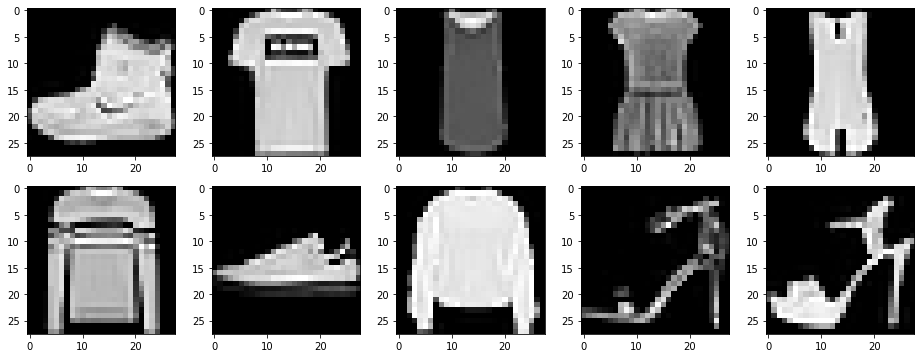

In [65]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)


# репрезентация данных
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i,:].reshape([28, 28]), cmap='gray')

In [66]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Building model for digit recognition

In [67]:
# Normalize the images.
x_train = (x_train / 255)
x_test = (x_test / 255)

# Flatten the images.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

In [68]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
# Build the model.
def create_model(optimizer='adam'):
    model = Sequential([
      Dense(64, input_shape=(784,), activation='relu'),
      Dense(32, activation='relu'),
      Dense(10, activation='sigmoid')
    ])

    # Compile the model.
    model.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    return model

In [70]:
result_list = []
model = create_model()

# Train the model.
model.fit(x_train, to_categorical(y_train), epochs=5, batch_size=32)

# Evaluate the model.
loss,metrics = model.evaluate(x_test, to_categorical(y_test))
print('*****************************')
print(f'Loss - {np.round(loss,4)}, Metrics - {np.round(metrics,4)}')
result_list.append(['64,32,10', np.round(loss,4), np.round(metrics,4)])

Epoch 1/5
1875/1875 [==============================] - 2s 865us/step - loss: 0.5291 - accuracy: 0.8135
Epoch 2/5
1875/1875 [==============================] - 2s 914us/step - loss: 0.3904 - accuracy: 0.8596
Epoch 3/5
1875/1875 [==============================] - 2s 857us/step - loss: 0.3541 - accuracy: 0.8723
Epoch 4/5
1875/1875 [==============================] - 2s 858us/step - loss: 0.3344 - accuracy: 0.8771
Epoch 5/5
313/313 [==============================] - 0s 591us/step - loss: 0.3717 - accuracy: 0.8690
*****************************
Loss - 0.3717, Metrics - 0.869


In [71]:
# Predict on the first 10 test images.
predictions = model.predict(x_test[:10])

# Print our model's predictions.
print(f'Predictions: {np.argmax(predictions, axis=1)}')

# Check our predictions against the ground truths.
print(f'True labels: {y_test[:10]}')

1/1 [==============================] - 0s 30ms/step
Predictions: [9 2 1 1 6 1 4 6 5 7]
True labels: [9 2 1 1 6 1 4 6 5 7]


## Выбор оптимального числа слоев и оптимального числа нейронов в слое

Так как обучающий датасет содержит 60000 экземпляров, то общее число параметров не должно превышать эту сумму. Попробуем перераспределить их между большим числом слоев и также попробуем изменить пропорцию количества нейронов одного слоя.  

In [91]:
#параметр neur_numbers включает количество нейронов во всех слоях, кроме последнего (так как последний должен содержать 10 нейронов и функцию активации sigmoid)
def create_model_nn(optimizer='adam', *neur_numbers):
    dense_list = [Dense(neur_numbers[0], input_shape=(784,), activation='relu')] #первый слой
    neur_numbers = neur_numbers[1:]
    for i in range(len(neur_numbers)):
        dense_list.append(Dense(neur_numbers[i], activation='relu'))
    dense_list.append(Dense(10, activation='sigmoid')) #последний слой
       
    model = Sequential(dense_list)

    # Compile the model.
    model.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    return model

In [73]:
# Три слоя: 50, 50 и 10 нейронов
model_1 = create_model_nn('adam', 50, 50)

In [74]:
# Train the model.
model_1.fit(x_train, to_categorical(y_train), epochs=5, batch_size=32)

# Evaluate the model.
loss,metrics = model_1.evaluate(x_test, to_categorical(y_test))
print('*****************************')
print(f'Loss - {np.round(loss,4)}, Metrics - {np.round(metrics,4)}')
result_list.append(['50,50,10', np.round(loss,4), np.round(metrics,4)])

Epoch 1/5
1875/1875 [==============================] - 2s 872us/step - loss: 0.5199 - accuracy: 0.8158
Epoch 2/5
1875/1875 [==============================] - 2s 823us/step - loss: 0.3842 - accuracy: 0.8607
Epoch 3/5
1875/1875 [==============================] - 2s 815us/step - loss: 0.3506 - accuracy: 0.8723
Epoch 4/5
1875/1875 [==============================] - 2s 818us/step - loss: 0.3309 - accuracy: 0.8783
Epoch 5/5
313/313 [==============================] - 0s 601us/step - loss: 0.3595 - accuracy: 0.8742
*****************************
Loss - 0.3595, Metrics - 0.8742


In [75]:
# 5 слоев
model_2 = create_model_nn('adam', 50, 40, 30, 20)

In [76]:
# Train the model.
model_2.fit(x_train, to_categorical(y_train), epochs=5, batch_size=32)

# Evaluate the model.
loss,metrics = model_2.evaluate(x_test, to_categorical(y_test))
print('*****************************')
print(f'Loss - {np.round(loss,4)}, Metrics - {np.round(metrics,4)}')
result_list.append(['50,40,30,20,10', np.round(loss,4), np.round(metrics,4)])

Epoch 1/5
1875/1875 [==============================] - 2s 897us/step - loss: 0.5627 - accuracy: 0.7990
Epoch 2/5
1875/1875 [==============================] - 2s 881us/step - loss: 0.3962 - accuracy: 0.8561
Epoch 3/5
1875/1875 [==============================] - 2s 926us/step - loss: 0.3587 - accuracy: 0.8695
Epoch 4/5
1875/1875 [==============================] - 2s 890us/step - loss: 0.3407 - accuracy: 0.8754
Epoch 5/5
313/313 [==============================] - 0s 612us/step - loss: 0.3635 - accuracy: 0.8699
*****************************
Loss - 0.3635, Metrics - 0.8699


In [77]:
# 4 слоя
model_3 = create_model_nn('adam', 64, 30, 20)
# Train the model.
model_3.fit(x_train, to_categorical(y_train), epochs=5, batch_size=32)

# Evaluate the model.
loss,metrics = model_3.evaluate(x_test, to_categorical(y_test))
print('*****************************')
print(f'Loss - {np.round(loss,4)}, Metrics - {np.round(metrics,4)}')
result_list.append(['64,30,20,10', np.round(loss,4), np.round(metrics,4)])

Epoch 1/5
1875/1875 [==============================] - 2s 887us/step - loss: 0.5493 - accuracy: 0.8027
Epoch 2/5
1875/1875 [==============================] - 2s 880us/step - loss: 0.3888 - accuracy: 0.8586
Epoch 3/5
1875/1875 [==============================] - 2s 878us/step - loss: 0.3528 - accuracy: 0.8716
Epoch 4/5
1875/1875 [==============================] - 2s 882us/step - loss: 0.3307 - accuracy: 0.8785
Epoch 5/5
313/313 [==============================] - 0s 608us/step - loss: 0.3540 - accuracy: 0.8739
*****************************
Loss - 0.354, Metrics - 0.8739


In [78]:
# 3 слоя
model_4 = create_model_nn('adam', 64, 32)
# Train the model.
model_4.fit(x_train, to_categorical(y_train), epochs=5, batch_size=32)

# Evaluate the model.
loss,metrics = model_4.evaluate(x_test, to_categorical(y_test))
print('*****************************')
print(f'Loss - {np.round(loss,4)}, Metrics - {np.round(metrics,4)}')
result_list.append(['64,32', np.round(loss,4), np.round(metrics,4)])

Epoch 1/5
1875/1875 [==============================] - 2s 861us/step - loss: 0.5291 - accuracy: 0.8165
Epoch 2/5
1875/1875 [==============================] - 2s 880us/step - loss: 0.3847 - accuracy: 0.8623
Epoch 3/5
1875/1875 [==============================] - 2s 851us/step - loss: 0.3516 - accuracy: 0.8748
Epoch 4/5
1875/1875 [==============================] - 2s 855us/step - loss: 0.3340 - accuracy: 0.8783
Epoch 5/5
313/313 [==============================] - 0s 587us/step - loss: 0.3525 - accuracy: 0.8762
*****************************
Loss - 0.3525, Metrics - 0.8762


In [79]:
# 9 слоев
model_5 = create_model_nn('adam', 50, 45, 40, 35, 30, 25, 20, 15)
# Train the model.
model_5.fit(x_train, to_categorical(y_train), epochs=5, batch_size=32)

# Evaluate the model.
loss,metrics = model_5.evaluate(x_test, to_categorical(y_test))
print('*****************************')
print(f'Loss - {np.round(loss,4)}, Metrics - {np.round(metrics,4)}')
result_list.append(['50, 45, 40, 35, 30, 25, 20, 15, 10', np.round(loss,4), np.round(metrics,4)])

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6485 - accuracy: 0.7650
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4206 - accuracy: 0.8481
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3785 - accuracy: 0.8613
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3582 - accuracy: 0.8713
Epoch 5/5
313/313 [==============================] - 0s 737us/step - loss: 0.3838 - accuracy: 0.8647
*****************************
Loss - 0.3838, Metrics - 0.8647


In [80]:
result_list

[['64,32,10', 0.3717, 0.869],
 ['50,50,10', 0.3595, 0.8742],
 ['50,40,30,20,10', 0.3635, 0.8699],
 ['64,30,20,10', 0.354, 0.8739],
 ['64,32', 0.3525, 0.8762],
 ['50, 45, 40, 35, 30, 25, 20, 15, 10', 0.3838, 0.8647]]

Вывод: оптимальной моделью является трехслойная модель с количеством нейронов 64, 32 и 10, на ней будем далее оптимизировать другие параметры.

### Picking params via GridSearchCV

In [81]:
batch_size = [32, 500, 1000, 5000]
epochs = [15, 50, 100, 200]
optimizer = ['SGD', 'RMSprop', 'Adam']

In [82]:
model = KerasClassifier(create_model_nn('adam', 64, 32))
params= dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)
grid = GridSearchCV(model, params, refit=False, cv=3, scoring='accuracy')

grid_result = grid.fit(x_train, to_categorical(y_train))
print(grid_result.best_score_, grid_result.best_params_)

INFO:tensorflow:Assets written to: ram://6eb8081a60bc472cbf72bf001d2022ab/assets


INFO:tensorflow:Assets written to: ram://6eb8081a60bc472cbf72bf001d2022ab/assets
2023-09-14 10:46:59.684157: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://6ad2947ab8d74ad6a47385d61615af13: INVALID_ARGUMENT: ram://6ad2947ab8d74ad6a47385d61615af13 is a directory.


INFO:tensorflow:Assets written to: ram://1abe4b46514b4bdb8ac66c290e6ce391/assets


INFO:tensorflow:Assets written to: ram://1abe4b46514b4bdb8ac66c290e6ce391/assets
2023-09-14 10:47:00.373129: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://2eae1481af3549bfbda4aa81401a9256: INVALID_ARGUMENT: ram://2eae1481af3549bfbda4aa81401a9256 is a directory.


Epoch 1/15
1250/1250 [==============================] - 1s 916us/step - loss: 0.5618 - accuracy: 0.8019
Epoch 2/15
1250/1250 [==============================] - 1s 907us/step - loss: 0.4102 - accuracy: 0.8537
Epoch 3/15
1250/1250 [==============================] - 1s 909us/step - loss: 0.3680 - accuracy: 0.8687
Epoch 4/15
1250/1250 [==============================] - 1s 906us/step - loss: 0.3435 - accuracy: 0.8758
Epoch 5/15
1250/1250 [==============================] - 1s 909us/step - loss: 0.3252 - accuracy: 0.8822
Epoch 6/15
1250/1250 [==============================] - 1s 908us/step - loss: 0.3096 - accuracy: 0.8877
Epoch 7/15
1250/1250 [==============================] - 1s 906us/step - loss: 0.2965 - accuracy: 0.8909
Epoch 8/15
1250/1250 [==============================] - 1s 902us/step - loss: 0.2850 - accuracy: 0.8927
Epoch 9/15
1250/1250 [==============================] - 1s 909us/step - loss: 0.2744 - accuracy: 0.8981
Epoch 10/15
1250/1250 [==============================] - 1s 928u

INFO:tensorflow:Assets written to: ram://ea361c8f4e72450bb89d951edf2562c9/assets
2023-09-14 10:47:19.349667: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://e5d36283349c47958eb560c1db726fa1: INVALID_ARGUMENT: ram://e5d36283349c47958eb560c1db726fa1 is a directory.


Epoch 1/15
1250/1250 [==============================] - 1s 941us/step - loss: 0.5646 - accuracy: 0.7983
Epoch 2/15
1250/1250 [==============================] - 1s 964us/step - loss: 0.4110 - accuracy: 0.8510
Epoch 3/15
1250/1250 [==============================] - 1s 948us/step - loss: 0.3738 - accuracy: 0.8638
Epoch 4/15
1250/1250 [==============================] - 1s 987us/step - loss: 0.3468 - accuracy: 0.8738
Epoch 5/15
1250/1250 [==============================] - 1s 889us/step - loss: 0.3316 - accuracy: 0.8782
Epoch 6/15
1250/1250 [==============================] - 1s 897us/step - loss: 0.3147 - accuracy: 0.8829
Epoch 7/15
1250/1250 [==============================] - 1s 889us/step - loss: 0.2992 - accuracy: 0.8884
Epoch 8/15
1250/1250 [==============================] - 1s 897us/step - loss: 0.2910 - accuracy: 0.8924
Epoch 9/15
1250/1250 [==============================] - 1s 972us/step - loss: 0.2796 - accuracy: 0.8953
Epoch 10/15
1250/1250 [==============================] - 1s 906u

INFO:tensorflow:Assets written to: ram://e74549037d0c42318dfcbb989fe11bde/assets
2023-09-14 10:47:37.973949: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://d24ea5fa508b4d98af563f807319449c: INVALID_ARGUMENT: ram://d24ea5fa508b4d98af563f807319449c is a directory.


Epoch 1/15
1250/1250 [==============================] - 1s 883us/step - loss: 0.5690 - accuracy: 0.8008
Epoch 2/15
1250/1250 [==============================] - 1s 896us/step - loss: 0.4110 - accuracy: 0.8539
Epoch 3/15
1250/1250 [==============================] - 1s 883us/step - loss: 0.3759 - accuracy: 0.8634
Epoch 4/15
1250/1250 [==============================] - 1s 886us/step - loss: 0.3467 - accuracy: 0.8734
Epoch 5/15
1250/1250 [==============================] - 1s 920us/step - loss: 0.3295 - accuracy: 0.8781
Epoch 6/15
1250/1250 [==============================] - 1s 924us/step - loss: 0.3126 - accuracy: 0.8857
Epoch 7/15
1250/1250 [==============================] - 1s 985us/step - loss: 0.3007 - accuracy: 0.8891
Epoch 8/15
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2884 - accuracy: 0.8928
Epoch 9/15
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2755 - accuracy: 0.8978
Epoch 10/15
1250/1250 [==============================] - 1s 1ms/step

INFO:tensorflow:Assets written to: ram://d7bd1c48e4654f83be8c3cc1c05e52e0/assets
2023-09-14 10:47:57.751675: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://f9b69b0625fb439fbcf3cb7e2ddd51cf: INVALID_ARGUMENT: ram://f9b69b0625fb439fbcf3cb7e2ddd51cf is a directory.


Epoch 1/15
1250/1250 [==============================] - 1s 1ms/step - loss: 0.5618 - accuracy: 0.8019
Epoch 2/15
1250/1250 [==============================] - 1s 1ms/step - loss: 0.4102 - accuracy: 0.8537
Epoch 3/15
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3680 - accuracy: 0.8687
Epoch 4/15
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3435 - accuracy: 0.8758
Epoch 5/15
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3252 - accuracy: 0.8822
Epoch 6/15
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3096 - accuracy: 0.8877
Epoch 7/15
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2965 - accuracy: 0.8909
Epoch 8/15
1250/1250 [==============================] - 1s 999us/step - loss: 0.2850 - accuracy: 0.8927
Epoch 9/15
1250/1250 [==============================] - 1s 997us/step - loss: 0.2744 - accuracy: 0.8981
Epoch 10/15
1250/1250 [==============================] - 1s 979us/step - loss:

INFO:tensorflow:Assets written to: ram://070f6ed4134d4ffbad93dfa30232b8ff/assets
2023-09-14 10:48:18.708960: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://82d9c7829d724bdba8aba29195d96493: INVALID_ARGUMENT: ram://82d9c7829d724bdba8aba29195d96493 is a directory.


Epoch 1/15
1250/1250 [==============================] - 1s 937us/step - loss: 0.5646 - accuracy: 0.7983
Epoch 2/15
1250/1250 [==============================] - 1s 964us/step - loss: 0.4110 - accuracy: 0.8510
Epoch 3/15
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3738 - accuracy: 0.8638
Epoch 4/15
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3468 - accuracy: 0.8738
Epoch 5/15
1250/1250 [==============================] - 1s 980us/step - loss: 0.3316 - accuracy: 0.8782
Epoch 6/15
1250/1250 [==============================] - 1s 984us/step - loss: 0.3147 - accuracy: 0.8829
Epoch 7/15
1250/1250 [==============================] - 1s 988us/step - loss: 0.2992 - accuracy: 0.8884
Epoch 8/15
1250/1250 [==============================] - 1s 983us/step - loss: 0.2910 - accuracy: 0.8924
Epoch 9/15
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2796 - accuracy: 0.8953
Epoch 10/15
1250/1250 [==============================] - 1s 978us/step

INFO:tensorflow:Assets written to: ram://5d593612f59947328e62383ff82244f0/assets
2023-09-14 10:48:38.900996: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://9b8f10eeebcd4aaeadca5c4b6a8459a7: INVALID_ARGUMENT: ram://9b8f10eeebcd4aaeadca5c4b6a8459a7 is a directory.


Epoch 1/15
1250/1250 [==============================] - 1s 948us/step - loss: 0.5690 - accuracy: 0.8008
Epoch 2/15
1250/1250 [==============================] - 1s 978us/step - loss: 0.4110 - accuracy: 0.8539
Epoch 3/15
1250/1250 [==============================] - 1s 978us/step - loss: 0.3759 - accuracy: 0.8634
Epoch 4/15
1250/1250 [==============================] - 1s 991us/step - loss: 0.3467 - accuracy: 0.8734
Epoch 5/15
1250/1250 [==============================] - 1s 999us/step - loss: 0.3295 - accuracy: 0.8781
Epoch 6/15
1250/1250 [==============================] - 1s 990us/step - loss: 0.3126 - accuracy: 0.8857
Epoch 7/15
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3007 - accuracy: 0.8891
Epoch 8/15
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2884 - accuracy: 0.8928
Epoch 9/15
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2755 - accuracy: 0.8978
Epoch 10/15
1250/1250 [==============================] - 1s 1ms/step -

INFO:tensorflow:Assets written to: ram://22c51264877b443bb1f344ce47fef811/assets
2023-09-14 10:48:59.183498: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://aad8e9d4746b434d99ae209386fe7600: INVALID_ARGUMENT: ram://aad8e9d4746b434d99ae209386fe7600 is a directory.


Epoch 1/15
1250/1250 [==============================] - 1s 1ms/step - loss: 0.5618 - accuracy: 0.8019
Epoch 2/15
1250/1250 [==============================] - 1s 1ms/step - loss: 0.4102 - accuracy: 0.8537
Epoch 3/15
1250/1250 [==============================] - 1s 994us/step - loss: 0.3680 - accuracy: 0.8687
Epoch 4/15
1250/1250 [==============================] - 1s 991us/step - loss: 0.3435 - accuracy: 0.8758
Epoch 5/15
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3252 - accuracy: 0.8822
Epoch 6/15
1250/1250 [==============================] - 1s 994us/step - loss: 0.3096 - accuracy: 0.8877
Epoch 7/15
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2965 - accuracy: 0.8909
Epoch 8/15
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2850 - accuracy: 0.8927
Epoch 9/15
1250/1250 [==============================] - 1s 990us/step - loss: 0.2744 - accuracy: 0.8981
Epoch 10/15
1250/1250 [==============================] - 1s 992us/step - l

INFO:tensorflow:Assets written to: ram://c890bf816a7a403083f23217b2833481/assets
2023-09-14 10:49:19.927370: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://4eb7d2a41cb041f695239f873c82cef3: INVALID_ARGUMENT: ram://4eb7d2a41cb041f695239f873c82cef3 is a directory.


Epoch 1/15
1250/1250 [==============================] - 1s 1ms/step - loss: 0.5646 - accuracy: 0.7983
Epoch 2/15
1250/1250 [==============================] - 1s 975us/step - loss: 0.4110 - accuracy: 0.8510
Epoch 3/15
1250/1250 [==============================] - 1s 947us/step - loss: 0.3738 - accuracy: 0.8638
Epoch 4/15
1250/1250 [==============================] - 1s 920us/step - loss: 0.3468 - accuracy: 0.8738
Epoch 5/15
1250/1250 [==============================] - 1s 928us/step - loss: 0.3316 - accuracy: 0.8782
Epoch 6/15
1250/1250 [==============================] - 1s 991us/step - loss: 0.3147 - accuracy: 0.8829
Epoch 7/15
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2992 - accuracy: 0.8884
Epoch 8/15
1250/1250 [==============================] - 2s 1ms/step - loss: 0.2910 - accuracy: 0.8924
Epoch 9/15
1250/1250 [==============================] - 1s 919us/step - loss: 0.2796 - accuracy: 0.8953
Epoch 10/15
1250/1250 [==============================] - 1s 963us/step

INFO:tensorflow:Assets written to: ram://beede66155f54ca483e3a63ebd89e773/assets
2023-09-14 10:49:41.777648: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://bcf7c44a48314dcb872a761814c80570: INVALID_ARGUMENT: ram://bcf7c44a48314dcb872a761814c80570 is a directory.


Epoch 1/15
1250/1250 [==============================] - 1s 861us/step - loss: 0.5690 - accuracy: 0.8008
Epoch 2/15
1250/1250 [==============================] - 1s 921us/step - loss: 0.4110 - accuracy: 0.8539
Epoch 3/15
1250/1250 [==============================] - 1s 973us/step - loss: 0.3759 - accuracy: 0.8634
Epoch 4/15
1250/1250 [==============================] - 1s 909us/step - loss: 0.3467 - accuracy: 0.8734
Epoch 5/15
1250/1250 [==============================] - 1s 989us/step - loss: 0.3295 - accuracy: 0.8781
Epoch 6/15
1250/1250 [==============================] - 1s 948us/step - loss: 0.3126 - accuracy: 0.8857
Epoch 7/15
1250/1250 [==============================] - 1s 904us/step - loss: 0.3007 - accuracy: 0.8891
Epoch 8/15
1250/1250 [==============================] - 1s 943us/step - loss: 0.2884 - accuracy: 0.8928
Epoch 9/15
1250/1250 [==============================] - 1s 937us/step - loss: 0.2755 - accuracy: 0.8978
Epoch 10/15
1250/1250 [==============================] - 1s 1ms/

INFO:tensorflow:Assets written to: ram://6f40a6f56b8d41479279478b4b2002e1/assets


INFO:tensorflow:Assets written to: ram://6f40a6f56b8d41479279478b4b2002e1/assets
2023-09-14 10:50:02.298371: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://e2b57d6a4b004847ba271d1bbde72b78: INVALID_ARGUMENT: ram://e2b57d6a4b004847ba271d1bbde72b78 is a directory.


Epoch 1/50
1250/1250 [==============================] - 1s 950us/step - loss: 0.5618 - accuracy: 0.8019
Epoch 2/50
1250/1250 [==============================] - 1s 947us/step - loss: 0.4102 - accuracy: 0.8537
Epoch 3/50
1250/1250 [==============================] - 1s 962us/step - loss: 0.3680 - accuracy: 0.8687
Epoch 4/50
1250/1250 [==============================] - 1s 946us/step - loss: 0.3435 - accuracy: 0.8758
Epoch 5/50
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3252 - accuracy: 0.8822
Epoch 6/50
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3096 - accuracy: 0.8877
Epoch 7/50
1250/1250 [==============================] - 1s 949us/step - loss: 0.2965 - accuracy: 0.8909
Epoch 8/50
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2850 - accuracy: 0.8927
Epoch 9/50
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2744 - accuracy: 0.8981
Epoch 10/50
1250/1250 [==============================] - 1s 980us/step -

INFO:tensorflow:Assets written to: ram://a558668522934bc9a7c3d2499bec55e4/assets
2023-09-14 10:51:07.027939: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://bc3d5cbb91cd43a7aa64834a1ae13415: INVALID_ARGUMENT: ram://bc3d5cbb91cd43a7aa64834a1ae13415 is a directory.


Epoch 1/50
1250/1250 [==============================] - 1s 957us/step - loss: 0.5646 - accuracy: 0.7983
Epoch 2/50
1250/1250 [==============================] - 1s 990us/step - loss: 0.4110 - accuracy: 0.8510
Epoch 3/50
1250/1250 [==============================] - 1s 982us/step - loss: 0.3738 - accuracy: 0.8638
Epoch 4/50
1250/1250 [==============================] - 1s 997us/step - loss: 0.3468 - accuracy: 0.8738
Epoch 5/50
1250/1250 [==============================] - 2s 1ms/step - loss: 0.3316 - accuracy: 0.8782
Epoch 6/50
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3147 - accuracy: 0.8829
Epoch 7/50
1250/1250 [==============================] - 1s 927us/step - loss: 0.2992 - accuracy: 0.8884
Epoch 8/50
1250/1250 [==============================] - 1s 953us/step - loss: 0.2910 - accuracy: 0.8924
Epoch 9/50
1250/1250 [==============================] - 1s 970us/step - loss: 0.2796 - accuracy: 0.8953
Epoch 10/50
1250/1250 [==============================] - 1s 963us/st

INFO:tensorflow:Assets written to: ram://cbba9c9477a645a68ef7ad4474c54f40/assets
2023-09-14 10:52:13.351574: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://290902c1f47f47cbabef35080a6804ab: INVALID_ARGUMENT: ram://290902c1f47f47cbabef35080a6804ab is a directory.


Epoch 1/50
1250/1250 [==============================] - 1s 901us/step - loss: 0.5690 - accuracy: 0.8008
Epoch 2/50
1250/1250 [==============================] - 1s 914us/step - loss: 0.4110 - accuracy: 0.8539
Epoch 3/50
1250/1250 [==============================] - 1s 940us/step - loss: 0.3759 - accuracy: 0.8634
Epoch 4/50
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3467 - accuracy: 0.8734
Epoch 5/50
1250/1250 [==============================] - 1s 962us/step - loss: 0.3295 - accuracy: 0.8781
Epoch 6/50
1250/1250 [==============================] - 1s 907us/step - loss: 0.3126 - accuracy: 0.8857
Epoch 7/50
1250/1250 [==============================] - 1s 911us/step - loss: 0.3007 - accuracy: 0.8891
Epoch 8/50
1250/1250 [==============================] - 1s 948us/step - loss: 0.2884 - accuracy: 0.8928
Epoch 9/50
1250/1250 [==============================] - 1s 983us/step - loss: 0.2755 - accuracy: 0.8978
Epoch 10/50
1250/1250 [==============================] - 1s 913us/

INFO:tensorflow:Assets written to: ram://e44afcf7e178450d87545c22bf1baf0b/assets
2023-09-14 10:53:15.510314: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://3cbc6a9f0b494aecb3c3340545102703: INVALID_ARGUMENT: ram://3cbc6a9f0b494aecb3c3340545102703 is a directory.


Epoch 1/50
1250/1250 [==============================] - 2s 1ms/step - loss: 0.5618 - accuracy: 0.8019
Epoch 2/50
1250/1250 [==============================] - 1s 976us/step - loss: 0.4102 - accuracy: 0.8537
Epoch 3/50
1250/1250 [==============================] - 1s 967us/step - loss: 0.3680 - accuracy: 0.8687
Epoch 4/50
1250/1250 [==============================] - 1s 955us/step - loss: 0.3435 - accuracy: 0.8758
Epoch 5/50
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3252 - accuracy: 0.8822
Epoch 6/50
1250/1250 [==============================] - 1s 911us/step - loss: 0.3096 - accuracy: 0.8877
Epoch 7/50
1250/1250 [==============================] - 1s 919us/step - loss: 0.2965 - accuracy: 0.8909
Epoch 8/50
1250/1250 [==============================] - 1s 921us/step - loss: 0.2850 - accuracy: 0.8927
Epoch 9/50
1250/1250 [==============================] - 1s 922us/step - loss: 0.2744 - accuracy: 0.8981
Epoch 10/50
1250/1250 [==============================] - 1s 915us/st

INFO:tensorflow:Assets written to: ram://0cc6fe021c8843c7a2144de0f74d6df7/assets
2023-09-14 10:54:16.121205: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://de9e474bf22342d9a12bf0eefe054a7a: INVALID_ARGUMENT: ram://de9e474bf22342d9a12bf0eefe054a7a is a directory.


Epoch 1/50
1250/1250 [==============================] - 1s 956us/step - loss: 0.5646 - accuracy: 0.7983
Epoch 2/50
1250/1250 [==============================] - 1s 932us/step - loss: 0.4110 - accuracy: 0.8510
Epoch 3/50
1250/1250 [==============================] - 1s 965us/step - loss: 0.3738 - accuracy: 0.8638
Epoch 4/50
1250/1250 [==============================] - 1s 934us/step - loss: 0.3468 - accuracy: 0.8738
Epoch 5/50
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3316 - accuracy: 0.8782
Epoch 6/50
1250/1250 [==============================] - 1s 964us/step - loss: 0.3147 - accuracy: 0.8829
Epoch 7/50
1250/1250 [==============================] - 1s 991us/step - loss: 0.2992 - accuracy: 0.8884
Epoch 8/50
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2910 - accuracy: 0.8924
Epoch 9/50
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2796 - accuracy: 0.8953
Epoch 10/50
1250/1250 [==============================] - 1s 986us/step

INFO:tensorflow:Assets written to: ram://ebf3625942324c97842cea6119a362fc/assets
2023-09-14 10:55:16.847543: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://eca9ebfbeb2543889466ccb2f527e755: INVALID_ARGUMENT: ram://eca9ebfbeb2543889466ccb2f527e755 is a directory.


Epoch 1/50
1250/1250 [==============================] - 1s 988us/step - loss: 0.5690 - accuracy: 0.8008
Epoch 2/50
1250/1250 [==============================] - 1s 909us/step - loss: 0.4110 - accuracy: 0.8539
Epoch 3/50
1250/1250 [==============================] - 1s 906us/step - loss: 0.3759 - accuracy: 0.8634
Epoch 4/50
1250/1250 [==============================] - 1s 912us/step - loss: 0.3467 - accuracy: 0.8734
Epoch 5/50
1250/1250 [==============================] - 1s 974us/step - loss: 0.3295 - accuracy: 0.8781
Epoch 6/50
1250/1250 [==============================] - 1s 904us/step - loss: 0.3126 - accuracy: 0.8857
Epoch 7/50
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3007 - accuracy: 0.8891
Epoch 8/50
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2884 - accuracy: 0.8928
Epoch 9/50
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2755 - accuracy: 0.8978
Epoch 10/50
1250/1250 [==============================] - 1s 1ms/step -

INFO:tensorflow:Assets written to: ram://c2f15a57c99647e18a67ba2590b55180/assets
2023-09-14 10:56:23.420348: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://059ed52177fa4d20b3147ab943d564f6: INVALID_ARGUMENT: ram://059ed52177fa4d20b3147ab943d564f6 is a directory.


Epoch 1/50
1250/1250 [==============================] - 1s 999us/step - loss: 0.5618 - accuracy: 0.8019
Epoch 2/50
1250/1250 [==============================] - 1s 998us/step - loss: 0.4102 - accuracy: 0.8537
Epoch 3/50
1250/1250 [==============================] - 1s 985us/step - loss: 0.3680 - accuracy: 0.8687
Epoch 4/50
1250/1250 [==============================] - 1s 991us/step - loss: 0.3435 - accuracy: 0.8758
Epoch 5/50
1250/1250 [==============================] - 1s 984us/step - loss: 0.3252 - accuracy: 0.8822
Epoch 6/50
1250/1250 [==============================] - 1s 991us/step - loss: 0.3096 - accuracy: 0.8877
Epoch 7/50
1250/1250 [==============================] - 1s 997us/step - loss: 0.2965 - accuracy: 0.8909
Epoch 8/50
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2850 - accuracy: 0.8927
Epoch 9/50
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2744 - accuracy: 0.8981
Epoch 10/50
1250/1250 [==============================] - 1s 999us/st

INFO:tensorflow:Assets written to: ram://d2a711dee2374e2995211847e2e55bec/assets
2023-09-14 10:57:28.773833: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://3851967983404564aadb120344645490: INVALID_ARGUMENT: ram://3851967983404564aadb120344645490 is a directory.


Epoch 1/50
1250/1250 [==============================] - 1s 994us/step - loss: 0.5646 - accuracy: 0.7983
Epoch 2/50
1250/1250 [==============================] - 1s 994us/step - loss: 0.4110 - accuracy: 0.8510
Epoch 3/50
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3738 - accuracy: 0.8638
Epoch 4/50
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3468 - accuracy: 0.8738
Epoch 5/50
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3316 - accuracy: 0.8782
Epoch 6/50
1250/1250 [==============================] - 1s 973us/step - loss: 0.3147 - accuracy: 0.8829
Epoch 7/50
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2992 - accuracy: 0.8884
Epoch 8/50
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2910 - accuracy: 0.8924
Epoch 9/50
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2796 - accuracy: 0.8953
Epoch 10/50
1250/1250 [==============================] - 2s 1ms/step - loss:

INFO:tensorflow:Assets written to: ram://1793b30eb23746e8a2cb486476b34bda/assets


2023-09-14 10:58:32.600204: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://ef4c0adf11d74dbf9509555a137d8543: INVALID_ARGUMENT: ram://ef4c0adf11d74dbf9509555a137d8543 is a directory.


Epoch 1/50
1250/1250 [==============================] - 1s 832us/step - loss: 0.5690 - accuracy: 0.8008
Epoch 2/50
1250/1250 [==============================] - 1s 904us/step - loss: 0.4110 - accuracy: 0.8539
Epoch 3/50
1250/1250 [==============================] - 1s 909us/step - loss: 0.3759 - accuracy: 0.8634
Epoch 4/50
1250/1250 [==============================] - 1s 910us/step - loss: 0.3467 - accuracy: 0.8734
Epoch 5/50
1250/1250 [==============================] - 1s 908us/step - loss: 0.3295 - accuracy: 0.8781
Epoch 6/50
1250/1250 [==============================] - 1s 913us/step - loss: 0.3126 - accuracy: 0.8857
Epoch 7/50
1250/1250 [==============================] - 1s 907us/step - loss: 0.3007 - accuracy: 0.8891
Epoch 8/50
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2884 - accuracy: 0.8928
Epoch 9/50
1250/1250 [==============================] - 1s 915us/step - loss: 0.2755 - accuracy: 0.8978
Epoch 10/50
1250/1250 [==============================] - 1s 911us/

INFO:tensorflow:Assets written to: ram://7962e1cbff1840d4b17541738450663e/assets
2023-09-14 10:59:37.198506: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://baefe9cfe08a4d6f8a808ef73fb1b0b9: INVALID_ARGUMENT: ram://baefe9cfe08a4d6f8a808ef73fb1b0b9 is a directory.


Epoch 1/100
1250/1250 [==============================] - 1s 871us/step - loss: 0.5618 - accuracy: 0.8019
Epoch 2/100
1250/1250 [==============================] - 1s 922us/step - loss: 0.4102 - accuracy: 0.8537
Epoch 3/100
1250/1250 [==============================] - 1s 925us/step - loss: 0.3680 - accuracy: 0.8687
Epoch 4/100
1250/1250 [==============================] - 1s 920us/step - loss: 0.3435 - accuracy: 0.8758
Epoch 5/100
1250/1250 [==============================] - 1s 929us/step - loss: 0.3252 - accuracy: 0.8822
Epoch 6/100
1250/1250 [==============================] - 1s 926us/step - loss: 0.3096 - accuracy: 0.8877
Epoch 7/100
1250/1250 [==============================] - 1s 993us/step - loss: 0.2965 - accuracy: 0.8909
Epoch 8/100
1250/1250 [==============================] - 1s 942us/step - loss: 0.2850 - accuracy: 0.8927
Epoch 9/100
1250/1250 [==============================] - 1s 923us/step - loss: 0.2744 - accuracy: 0.8981
Epoch 10/100
1250/1250 [==============================]

INFO:tensorflow:Assets written to: ram://b4ad596854b84f749d933f5bc6762960/assets
2023-09-14 11:01:48.015414: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://a110986a31ad4b9d976014033adf325a: INVALID_ARGUMENT: ram://a110986a31ad4b9d976014033adf325a is a directory.


Epoch 1/100
1250/1250 [==============================] - 1s 882us/step - loss: 0.5646 - accuracy: 0.7983
Epoch 2/100
1250/1250 [==============================] - 1s 932us/step - loss: 0.4110 - accuracy: 0.8510
Epoch 3/100
1250/1250 [==============================] - 1s 916us/step - loss: 0.3738 - accuracy: 0.8638
Epoch 4/100
1250/1250 [==============================] - 1s 922us/step - loss: 0.3468 - accuracy: 0.8738
Epoch 5/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3316 - accuracy: 0.8782
Epoch 6/100
1250/1250 [==============================] - 1s 918us/step - loss: 0.3147 - accuracy: 0.8829
Epoch 7/100
1250/1250 [==============================] - 1s 939us/step - loss: 0.2992 - accuracy: 0.8884
Epoch 8/100
1250/1250 [==============================] - 1s 936us/step - loss: 0.2910 - accuracy: 0.8924
Epoch 9/100
1250/1250 [==============================] - 1s 928us/step - loss: 0.2796 - accuracy: 0.8953
Epoch 10/100
1250/1250 [==============================] -

INFO:tensorflow:Assets written to: ram://02f00d39bfbf4ac180f4dfd897675397/assets
2023-09-14 11:03:59.843725: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://33c4037726c044d685a5d69718bf51d9: INVALID_ARGUMENT: ram://33c4037726c044d685a5d69718bf51d9 is a directory.


Epoch 1/100
1250/1250 [==============================] - 2s 1ms/step - loss: 0.5690 - accuracy: 0.8008
Epoch 2/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.4110 - accuracy: 0.8539
Epoch 3/100
1250/1250 [==============================] - 2s 1ms/step - loss: 0.3759 - accuracy: 0.8634
Epoch 4/100
1250/1250 [==============================] - 2s 1ms/step - loss: 0.3467 - accuracy: 0.8734
Epoch 5/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3295 - accuracy: 0.8781
Epoch 6/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3126 - accuracy: 0.8857
Epoch 7/100
1250/1250 [==============================] - 1s 957us/step - loss: 0.3007 - accuracy: 0.8891
Epoch 8/100
1250/1250 [==============================] - 1s 956us/step - loss: 0.2884 - accuracy: 0.8928
Epoch 9/100
1250/1250 [==============================] - 1s 961us/step - loss: 0.2755 - accuracy: 0.8978
Epoch 10/100
1250/1250 [==============================] - 1s 953us/

INFO:tensorflow:Assets written to: ram://2e911ada5c61470e9f6d2216c29d0036/assets
2023-09-14 11:06:14.680371: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://145240974a524eb09b277dfe1d36df08: INVALID_ARGUMENT: ram://145240974a524eb09b277dfe1d36df08 is a directory.


Epoch 1/100
1250/1250 [==============================] - 1s 916us/step - loss: 0.5618 - accuracy: 0.8019
Epoch 2/100
1250/1250 [==============================] - 1s 968us/step - loss: 0.4102 - accuracy: 0.8537
Epoch 3/100
1250/1250 [==============================] - 1s 949us/step - loss: 0.3680 - accuracy: 0.8687
Epoch 4/100
1250/1250 [==============================] - 1s 954us/step - loss: 0.3435 - accuracy: 0.8758
Epoch 5/100
1250/1250 [==============================] - 1s 948us/step - loss: 0.3252 - accuracy: 0.8822
Epoch 6/100
1250/1250 [==============================] - 1s 944us/step - loss: 0.3096 - accuracy: 0.8877
Epoch 7/100
1250/1250 [==============================] - 1s 946us/step - loss: 0.2965 - accuracy: 0.8909
Epoch 8/100
1250/1250 [==============================] - 1s 948us/step - loss: 0.2850 - accuracy: 0.8927
Epoch 9/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2744 - accuracy: 0.8981
Epoch 10/100
1250/1250 [==============================] -

INFO:tensorflow:Assets written to: ram://44ef5237dd0a4d07824d952d3f502f48/assets
2023-09-14 11:08:20.322429: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://703ea6176dee4a059a200deb59622424: INVALID_ARGUMENT: ram://703ea6176dee4a059a200deb59622424 is a directory.


Epoch 1/100
1250/1250 [==============================] - 1s 943us/step - loss: 0.5646 - accuracy: 0.7983
Epoch 2/100
1250/1250 [==============================] - 1s 978us/step - loss: 0.4110 - accuracy: 0.8510
Epoch 3/100
1250/1250 [==============================] - 1s 976us/step - loss: 0.3738 - accuracy: 0.8638
Epoch 4/100
1250/1250 [==============================] - 1s 977us/step - loss: 0.3468 - accuracy: 0.8738
Epoch 5/100
1250/1250 [==============================] - 1s 979us/step - loss: 0.3316 - accuracy: 0.8782
Epoch 6/100
1250/1250 [==============================] - 1s 977us/step - loss: 0.3147 - accuracy: 0.8829
Epoch 7/100
1250/1250 [==============================] - 1s 983us/step - loss: 0.2992 - accuracy: 0.8884
Epoch 8/100
1250/1250 [==============================] - 1s 967us/step - loss: 0.2910 - accuracy: 0.8924
Epoch 9/100
1250/1250 [==============================] - 1s 980us/step - loss: 0.2796 - accuracy: 0.8953
Epoch 10/100
1250/1250 [==============================]

INFO:tensorflow:Assets written to: ram://91682e218bfb4997a354d1e6ab841dfa/assets
2023-09-14 11:10:28.289482: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://8e04e37981b5428193d4e83882c2e0de: INVALID_ARGUMENT: ram://8e04e37981b5428193d4e83882c2e0de is a directory.


Epoch 1/100
1250/1250 [==============================] - 1s 938us/step - loss: 0.5690 - accuracy: 0.8008
Epoch 2/100
1250/1250 [==============================] - 1s 978us/step - loss: 0.4110 - accuracy: 0.8539
Epoch 3/100
1250/1250 [==============================] - 1s 978us/step - loss: 0.3759 - accuracy: 0.8634
Epoch 4/100
1250/1250 [==============================] - 1s 978us/step - loss: 0.3467 - accuracy: 0.8734
Epoch 5/100
1250/1250 [==============================] - 1s 991us/step - loss: 0.3295 - accuracy: 0.8781
Epoch 6/100
1250/1250 [==============================] - 1s 990us/step - loss: 0.3126 - accuracy: 0.8857
Epoch 7/100
1250/1250 [==============================] - 1s 980us/step - loss: 0.3007 - accuracy: 0.8891
Epoch 8/100
1250/1250 [==============================] - 1s 978us/step - loss: 0.2884 - accuracy: 0.8928
Epoch 9/100
1250/1250 [==============================] - 1s 977us/step - loss: 0.2755 - accuracy: 0.8978
Epoch 10/100
1250/1250 [==============================]

INFO:tensorflow:Assets written to: ram://9388b652c4de47d7ba4b93123bf18cbc/assets
2023-09-14 11:12:34.655131: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://1be493e919b6408aae47a2ea69b9dcb2: INVALID_ARGUMENT: ram://1be493e919b6408aae47a2ea69b9dcb2 is a directory.


Epoch 1/100


1250/1250 [==============================] - 2s 1ms/step - loss: 0.5618 - accuracy: 0.8019
Epoch 2/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.4102 - accuracy: 0.8537
Epoch 3/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3680 - accuracy: 0.8687
Epoch 4/100
1250/1250 [==============================] - 2s 1ms/step - loss: 0.3435 - accuracy: 0.8758
Epoch 5/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3252 - accuracy: 0.8822
Epoch 6/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3096 - accuracy: 0.8877
Epoch 7/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2965 - accuracy: 0.8909
Epoch 8/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2850 - accuracy: 0.8927
Epoch 9/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2744 - accuracy: 0.8981
Epoch 10/100
1250/1250 [==============================] - 2s 1ms/step - loss: 0.2651 

Epoch 80/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0880 - accuracy: 0.9677
Epoch 81/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0820 - accuracy: 0.9692
Epoch 82/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0810 - accuracy: 0.9680
Epoch 83/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0812 - accuracy: 0.9692
Epoch 84/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0802 - accuracy: 0.9714
Epoch 85/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0782 - accuracy: 0.9707
Epoch 86/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0754 - accuracy: 0.9716
Epoch 87/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0798 - accuracy: 0.9707
Epoch 88/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0722 - accuracy: 0.9731
Epoch 89/100
1250/1250 [==============================] - 1s 1ms

INFO:tensorflow:Assets written to: ram://8a53e179358d403ea28fd29f1b2f3285/assets
2023-09-14 11:14:55.887784: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://425cf2e3870843008fee5acdf4759302: INVALID_ARGUMENT: ram://425cf2e3870843008fee5acdf4759302 is a directory.


Epoch 1/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.5646 - accuracy: 0.7983
Epoch 2/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.4110 - accuracy: 0.8510
Epoch 3/100
1250/1250 [==============================] - 1s 968us/step - loss: 0.3738 - accuracy: 0.8638
Epoch 4/100
1250/1250 [==============================] - 1s 966us/step - loss: 0.3468 - accuracy: 0.8738
Epoch 5/100
1250/1250 [==============================] - 1s 958us/step - loss: 0.3316 - accuracy: 0.8782
Epoch 6/100
1250/1250 [==============================] - 1s 959us/step - loss: 0.3147 - accuracy: 0.8829
Epoch 7/100
1250/1250 [==============================] - 1s 959us/step - loss: 0.2992 - accuracy: 0.8884
Epoch 8/100
1250/1250 [==============================] - 1s 957us/step - loss: 0.2910 - accuracy: 0.8924
Epoch 9/100
1250/1250 [==============================] - 1s 960us/step - loss: 0.2796 - accuracy: 0.8953
Epoch 10/100
1250/1250 [==============================] - 1

Epoch 79/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0903 - accuracy: 0.9665
Epoch 80/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0924 - accuracy: 0.9650
Epoch 81/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0895 - accuracy: 0.9660
Epoch 82/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0914 - accuracy: 0.9659
Epoch 83/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0865 - accuracy: 0.9671
Epoch 84/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0869 - accuracy: 0.9676
Epoch 85/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0885 - accuracy: 0.9666
Epoch 86/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0886 - accuracy: 0.9664
Epoch 87/100
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0873 - accuracy: 0.9674
Epoch 88/100
1250/1250 [==============================] - 1s 1ms

INFO:tensorflow:Assets written to: ram://2ebb92756bda42c982433e63c5d79435/assets
2023-09-14 11:17:09.386946: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://3d6e346a9f974a498c134eab7575ff19: INVALID_ARGUMENT: ram://3d6e346a9f974a498c134eab7575ff19 is a directory.


Epoch 1/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.5690 - accuracy: 0.8008
Epoch 2/100
1250/1250 [==============================] - 1s 969us/step - loss: 0.4110 - accuracy: 0.8539
Epoch 3/100
1250/1250 [==============================] - 1s 973us/step - loss: 0.3759 - accuracy: 0.8634
Epoch 4/100
1250/1250 [==============================] - 1s 984us/step - loss: 0.3467 - accuracy: 0.8734
Epoch 5/100
1250/1250 [==============================] - 1s 961us/step - loss: 0.3295 - accuracy: 0.8781
Epoch 6/100
1250/1250 [==============================] - 1s 955us/step - loss: 0.3126 - accuracy: 0.8857
Epoch 7/100
1250/1250 [==============================] - 1s 957us/step - loss: 0.3007 - accuracy: 0.8891
Epoch 8/100
1250/1250 [==============================] - 1s 957us/step - loss: 0.2884 - accuracy: 0.8928
Epoch 9/100
1250/1250 [==============================] - 1s 954us/step - loss: 0.2755 - accuracy: 0.8978
Epoch 10/100
1250/1250 [==============================] -

INFO:tensorflow:Assets written to: ram://de706b0fd27b43128b6f77ab3393af67/assets
2023-09-14 11:19:23.250968: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://ef9e4130762649828524902e64ece2ba: INVALID_ARGUMENT: ram://ef9e4130762649828524902e64ece2ba is a directory.


Epoch 1/200
1250/1250 [==============================] - 1s 937us/step - loss: 0.5618 - accuracy: 0.8019
Epoch 2/200
1250/1250 [==============================] - 1s 963us/step - loss: 0.4102 - accuracy: 0.8537
Epoch 3/200
1250/1250 [==============================] - 1s 964us/step - loss: 0.3680 - accuracy: 0.8687
Epoch 4/200
1250/1250 [==============================] - 1s 959us/step - loss: 0.3435 - accuracy: 0.8758
Epoch 5/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3252 - accuracy: 0.8822
Epoch 6/200
1250/1250 [==============================] - 1s 964us/step - loss: 0.3096 - accuracy: 0.8877
Epoch 7/200
1250/1250 [==============================] - 1s 954us/step - loss: 0.2965 - accuracy: 0.8909
Epoch 8/200
1250/1250 [==============================] - 1s 954us/step - loss: 0.2850 - accuracy: 0.8927
Epoch 9/200
1250/1250 [==============================] - 1s 951us/step - loss: 0.2744 - accuracy: 0.8981
Epoch 10/200
1250/1250 [==============================] -

1250/1250 [==============================] - 1s 1ms/step - loss: 0.0414 - accuracy: 0.9844
Epoch 158/200
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0466 - accuracy: 0.9830
Epoch 159/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0478 - accuracy: 0.9825
Epoch 160/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0420 - accuracy: 0.9853
Epoch 161/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0448 - accuracy: 0.9840
Epoch 162/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0393 - accuracy: 0.9856
Epoch 163/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0548 - accuracy: 0.9812
Epoch 164/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0357 - accuracy: 0.9873
Epoch 165/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0470 - accuracy: 0.9826
Epoch 166/200
1250/1250 [==============================] - 1s 1ms/ste

INFO:tensorflow:Assets written to: ram://6db6352a19f74c9e8dd7d52476c7ca03/assets
2023-09-14 11:23:56.815225: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://71b288e5a2504635b18439b63c976145: INVALID_ARGUMENT: ram://71b288e5a2504635b18439b63c976145 is a directory.


Epoch 1/200
1250/1250 [==============================] - 2s 1ms/step - loss: 0.5646 - accuracy: 0.7983
Epoch 2/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.4110 - accuracy: 0.8510
Epoch 3/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3738 - accuracy: 0.8638
Epoch 4/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3468 - accuracy: 0.8738
Epoch 5/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3316 - accuracy: 0.8782
Epoch 6/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3147 - accuracy: 0.8829
Epoch 7/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2992 - accuracy: 0.8884
Epoch 8/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2910 - accuracy: 0.8924
Epoch 9/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2796 - accuracy: 0.8953
Epoch 10/200
1250/1250 [==============================] - 1s 1ms/step - l

1250/1250 [==============================] - 1s 1ms/step - loss: 0.0496 - accuracy: 0.9819
Epoch 158/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0511 - accuracy: 0.9816
Epoch 159/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0543 - accuracy: 0.9804
Epoch 160/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0524 - accuracy: 0.9815
Epoch 161/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0489 - accuracy: 0.9819
Epoch 162/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0441 - accuracy: 0.9842
Epoch 163/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0538 - accuracy: 0.9808
Epoch 164/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0437 - accuracy: 0.9844
Epoch 165/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0453 - accuracy: 0.9834
Epoch 166/200
1250/1250 [==============================] - 1s 1ms/ste

INFO:tensorflow:Assets written to: ram://e0ef626dcf79491281542b86b484de88/assets
2023-09-14 11:28:27.520442: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://65eacb7a30ce460d9690e847edc61b25: INVALID_ARGUMENT: ram://65eacb7a30ce460d9690e847edc61b25 is a directory.


Epoch 1/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.5690 - accuracy: 0.8008
Epoch 2/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.4110 - accuracy: 0.8539
Epoch 3/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3759 - accuracy: 0.8634
Epoch 4/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3467 - accuracy: 0.8734
Epoch 5/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3295 - accuracy: 0.8781
Epoch 6/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3126 - accuracy: 0.8857
Epoch 7/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3007 - accuracy: 0.8891
Epoch 8/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2884 - accuracy: 0.8928
Epoch 9/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2755 - accuracy: 0.8978
Epoch 10/200
1250/1250 [==============================] - 1s 1ms/step - l

1250/1250 [==============================] - 1s 1ms/step - loss: 0.0481 - accuracy: 0.9823
Epoch 158/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0452 - accuracy: 0.9835
Epoch 159/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0440 - accuracy: 0.9840
Epoch 160/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0436 - accuracy: 0.9840
Epoch 161/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0533 - accuracy: 0.9812
Epoch 162/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0408 - accuracy: 0.9851
Epoch 163/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0453 - accuracy: 0.9834
Epoch 164/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0423 - accuracy: 0.9846
Epoch 165/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0477 - accuracy: 0.9827
Epoch 166/200
1250/1250 [==============================] - 1s 1ms/ste

INFO:tensorflow:Assets written to: ram://6f9536d7416040c99d492dcb5801fff9/assets
2023-09-14 11:32:58.871475: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://def4cb536d3044ed8a9f242469531102: INVALID_ARGUMENT: ram://def4cb536d3044ed8a9f242469531102 is a directory.


Epoch 1/200
1250/1250 [==============================] - 1s 981us/step - loss: 0.5618 - accuracy: 0.8019
Epoch 2/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.4102 - accuracy: 0.8537
Epoch 3/200
1250/1250 [==============================] - 1s 985us/step - loss: 0.3680 - accuracy: 0.8687
Epoch 4/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3435 - accuracy: 0.8758
Epoch 5/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3252 - accuracy: 0.8822
Epoch 6/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3096 - accuracy: 0.8877
Epoch 7/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2965 - accuracy: 0.8909
Epoch 8/200
1250/1250 [==============================] - 1s 995us/step - loss: 0.2850 - accuracy: 0.8927
Epoch 9/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2744 - accuracy: 0.8981
Epoch 10/200
1250/1250 [==============================] - 1s 1ms/st

1250/1250 [==============================] - 1s 953us/step - loss: 0.0472 - accuracy: 0.9827
Epoch 157/200
1250/1250 [==============================] - 1s 955us/step - loss: 0.0414 - accuracy: 0.9844
Epoch 158/200
1250/1250 [==============================] - 1s 960us/step - loss: 0.0466 - accuracy: 0.9830
Epoch 159/200
1250/1250 [==============================] - 1s 961us/step - loss: 0.0478 - accuracy: 0.9825
Epoch 160/200
1250/1250 [==============================] - 1s 950us/step - loss: 0.0420 - accuracy: 0.9853
Epoch 161/200
1250/1250 [==============================] - 1s 934us/step - loss: 0.0448 - accuracy: 0.9840
Epoch 162/200
1250/1250 [==============================] - 1s 935us/step - loss: 0.0393 - accuracy: 0.9856
Epoch 163/200
1250/1250 [==============================] - 1s 954us/step - loss: 0.0548 - accuracy: 0.9812
Epoch 164/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0357 - accuracy: 0.9873
Epoch 165/200
1250/1250 [============================

INFO:tensorflow:Assets written to: ram://b40b02e6149241218a6ed62e7888b580/assets


INFO:tensorflow:Assets written to: ram://b40b02e6149241218a6ed62e7888b580/assets
2023-09-14 11:37:22.598490: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://0b920670715d49869e907662b4a5b4cd: INVALID_ARGUMENT: ram://0b920670715d49869e907662b4a5b4cd is a directory.


Epoch 1/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.5646 - accuracy: 0.7983
Epoch 2/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.4110 - accuracy: 0.8510
Epoch 3/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3738 - accuracy: 0.8638
Epoch 4/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3468 - accuracy: 0.8738
Epoch 5/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3316 - accuracy: 0.8782
Epoch 6/200
1250/1250 [==============================] - 2s 1ms/step - loss: 0.3147 - accuracy: 0.8829
Epoch 7/200
1250/1250 [==============================] - 2s 1ms/step - loss: 0.2992 - accuracy: 0.8884
Epoch 8/200
1250/1250 [==============================] - 2s 1ms/step - loss: 0.2910 - accuracy: 0.8924
Epoch 9/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2796 - accuracy: 0.8953
Epoch 10/200
1250/1250 [==============================] - 1s 1ms/step - l

1250/1250 [==============================] - 1s 1ms/step - loss: 0.0903 - accuracy: 0.9665
Epoch 80/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0924 - accuracy: 0.9650
Epoch 81/200
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0895 - accuracy: 0.9660
Epoch 82/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0914 - accuracy: 0.9659
Epoch 83/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0865 - accuracy: 0.9671
Epoch 84/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0869 - accuracy: 0.9676
Epoch 85/200
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0885 - accuracy: 0.9666
Epoch 86/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0886 - accuracy: 0.9664
Epoch 87/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0873 - accuracy: 0.9674
Epoch 88/200
1250/1250 [==============================] - 1s 1ms/step - loss:

INFO:tensorflow:Assets written to: ram://3e0b69749c9f48028c43056f306a54c4/assets
2023-09-14 11:41:52.574641: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://15fa7e680da940009971f71ecf5c01a1: INVALID_ARGUMENT: ram://15fa7e680da940009971f71ecf5c01a1 is a directory.


Epoch 1/200
1250/1250 [==============================] - 2s 1ms/step - loss: 0.5690 - accuracy: 0.8008
Epoch 2/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.4110 - accuracy: 0.8539
Epoch 3/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3759 - accuracy: 0.8634
Epoch 4/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3467 - accuracy: 0.8734
Epoch 5/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3295 - accuracy: 0.8781
Epoch 6/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3126 - accuracy: 0.8857
Epoch 7/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3007 - accuracy: 0.8891
Epoch 8/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2884 - accuracy: 0.8928
Epoch 9/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2755 - accuracy: 0.8978
Epoch 10/200
1250/1250 [==============================] - 1s 1ms/step - l

1250/1250 [==============================] - 1s 1ms/step - loss: 0.0481 - accuracy: 0.9823
Epoch 158/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0452 - accuracy: 0.9835
Epoch 159/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0440 - accuracy: 0.9840
Epoch 160/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0436 - accuracy: 0.9840
Epoch 161/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0533 - accuracy: 0.9812
Epoch 162/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0408 - accuracy: 0.9851
Epoch 163/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0453 - accuracy: 0.9834
Epoch 164/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0423 - accuracy: 0.9846
Epoch 165/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0477 - accuracy: 0.9827
Epoch 166/200
1250/1250 [==============================] - 1s 1ms/ste

INFO:tensorflow:Assets written to: ram://3d4b83d910394452958bb73fe06db7a5/assets
2023-09-14 11:46:33.740315: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://a21d2646c8ea443cbaa739d9748b38d3: INVALID_ARGUMENT: ram://a21d2646c8ea443cbaa739d9748b38d3 is a directory.


Epoch 1/200
1250/1250 [==============================] - 2s 1ms/step - loss: 0.5618 - accuracy: 0.8019
Epoch 2/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.4102 - accuracy: 0.8537
Epoch 3/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3680 - accuracy: 0.8687
Epoch 4/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3435 - accuracy: 0.8758
Epoch 5/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3252 - accuracy: 0.8822
Epoch 6/200
1250/1250 [==============================] - 2s 1ms/step - loss: 0.3096 - accuracy: 0.8877
Epoch 7/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2965 - accuracy: 0.8909
Epoch 8/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2850 - accuracy: 0.8927
Epoch 9/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2744 - accuracy: 0.8981
Epoch 10/200
1250/1250 [==============================] - 1s 1ms/step - l

1250/1250 [==============================] - 1s 1ms/step - loss: 0.0414 - accuracy: 0.9844
Epoch 158/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0466 - accuracy: 0.9830
Epoch 159/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0478 - accuracy: 0.9825
Epoch 160/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0420 - accuracy: 0.9853
Epoch 161/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0448 - accuracy: 0.9840
Epoch 162/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0393 - accuracy: 0.9856
Epoch 163/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0548 - accuracy: 0.9812
Epoch 164/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0357 - accuracy: 0.9873
Epoch 165/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0470 - accuracy: 0.9826
Epoch 166/200
1250/1250 [==============================] - 1s 1ms/ste

INFO:tensorflow:Assets written to: ram://0a96651816414e0ea319a33802cc7b44/assets
2023-09-14 11:51:07.213911: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://c7fce4401a444943a38747e60c80fe2a: INVALID_ARGUMENT: ram://c7fce4401a444943a38747e60c80fe2a is a directory.


Epoch 1/200
1250/1250 [==============================] - 2s 1ms/step - loss: 0.5646 - accuracy: 0.7983
Epoch 2/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.4110 - accuracy: 0.8510
Epoch 3/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3738 - accuracy: 0.8638
Epoch 4/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3468 - accuracy: 0.8738
Epoch 5/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3316 - accuracy: 0.8782
Epoch 6/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3147 - accuracy: 0.8829
Epoch 7/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2992 - accuracy: 0.8884
Epoch 8/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2910 - accuracy: 0.8924
Epoch 9/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2796 - accuracy: 0.8953
Epoch 10/200
1250/1250 [==============================] - 1s 1ms/step - l

1250/1250 [==============================] - 1s 1ms/step - loss: 0.0496 - accuracy: 0.9819
Epoch 158/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0511 - accuracy: 0.9816
Epoch 159/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0543 - accuracy: 0.9804
Epoch 160/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0524 - accuracy: 0.9815
Epoch 161/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0489 - accuracy: 0.9819
Epoch 162/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0441 - accuracy: 0.9842
Epoch 163/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0538 - accuracy: 0.9808
Epoch 164/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0437 - accuracy: 0.9844
Epoch 165/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0453 - accuracy: 0.9834
Epoch 166/200
1250/1250 [==============================] - 1s 1ms/ste

INFO:tensorflow:Assets written to: ram://23ff366b5fea43709e5dd74f158165ca/assets
2023-09-14 11:55:38.614727: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://45537fff537b435798c9d613e086bbab: INVALID_ARGUMENT: ram://45537fff537b435798c9d613e086bbab is a directory.


Epoch 1/200
1250/1250 [==============================] - 2s 1ms/step - loss: 0.5690 - accuracy: 0.8008
Epoch 2/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.4110 - accuracy: 0.8539
Epoch 3/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3759 - accuracy: 0.8634
Epoch 4/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3467 - accuracy: 0.8734
Epoch 5/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3295 - accuracy: 0.8781
Epoch 6/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3126 - accuracy: 0.8857
Epoch 7/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3007 - accuracy: 0.8891
Epoch 8/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2884 - accuracy: 0.8928
Epoch 9/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2755 - accuracy: 0.8978
Epoch 10/200
1250/1250 [==============================] - 1s 1ms/step - l

1250/1250 [==============================] - 1s 1ms/step - loss: 0.0481 - accuracy: 0.9823
Epoch 158/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0452 - accuracy: 0.9835
Epoch 159/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0440 - accuracy: 0.9840
Epoch 160/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0436 - accuracy: 0.9840
Epoch 161/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0533 - accuracy: 0.9812
Epoch 162/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0408 - accuracy: 0.9851
Epoch 163/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0453 - accuracy: 0.9834
Epoch 164/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0423 - accuracy: 0.9846
Epoch 165/200
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0477 - accuracy: 0.9827
Epoch 166/200
1250/1250 [==============================] - 1s 1ms/ste

INFO:tensorflow:Assets written to: ram://d5b2eba82b4141ee9214c29b58274aef/assets
2023-09-14 12:00:11.072423: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://002c1d5cbd51471d882b3c89766e4036: INVALID_ARGUMENT: ram://002c1d5cbd51471d882b3c89766e4036 is a directory.


Epoch 1/15
80/80 [==============================] - 0s 2ms/step - loss: 0.9462 - accuracy: 0.6807
Epoch 2/15
80/80 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.8253
Epoch 3/15
80/80 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.8424
Epoch 4/15
80/80 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8558
Epoch 5/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8632
Epoch 6/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8687
Epoch 7/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8708
Epoch 8/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8741
Epoch 9/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8786
Epoch 10/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8797
Epoch 11/15
80/80 [

INFO:tensorflow:Assets written to: ram://84265d8983894301b7113178c90b3375/assets


INFO:tensorflow:Assets written to: ram://84265d8983894301b7113178c90b3375/assets
2023-09-14 12:00:15.377406: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://2cbca978338746bd81568b64f0fa4ce6: INVALID_ARGUMENT: ram://2cbca978338746bd81568b64f0fa4ce6 is a directory.


Epoch 1/15
80/80 [==============================] - 0s 2ms/step - loss: 0.9495 - accuracy: 0.6793
Epoch 2/15
80/80 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.8248
Epoch 3/15
80/80 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8425
Epoch 4/15
80/80 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8523
Epoch 5/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8593
Epoch 6/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8640
Epoch 7/15
80/80 [==============================] - 0s 3ms/step - loss: 0.3689 - accuracy: 0.8698
Epoch 8/15
80/80 [==============================] - 0s 3ms/step - loss: 0.3558 - accuracy: 0.8745
Epoch 9/15
80/80 [==============================] - 0s 3ms/step - loss: 0.3472 - accuracy: 0.8771
Epoch 10/15
80/80 [==============================] - 0s 3ms/step - loss: 0.3363 - accuracy: 0.8789
Epoch 11/15
80/80 [

INFO:tensorflow:Assets written to: ram://fd49d3e1329d47b6bab77e93672551ad/assets
2023-09-14 12:00:19.563872: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://c5253b48138941869bdac5481a467f23: INVALID_ARGUMENT: ram://c5253b48138941869bdac5481a467f23 is a directory.


Epoch 1/15
80/80 [==============================] - 0s 2ms/step - loss: 0.9400 - accuracy: 0.6841
Epoch 2/15
80/80 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.8228
Epoch 3/15
80/80 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.8422
Epoch 4/15
80/80 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8503
Epoch 5/15
80/80 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8585
Epoch 6/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8663
Epoch 7/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.8711
Epoch 8/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8720
Epoch 9/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.8774
Epoch 10/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8804
Epoch 11/15
80/80 [

INFO:tensorflow:Assets written to: ram://aaf41c72512b4926ad93021891ca4f3a/assets
2023-09-14 12:00:23.557230: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://8db884fbe3bf4e029018f1b955509f28: INVALID_ARGUMENT: ram://8db884fbe3bf4e029018f1b955509f28 is a directory.


Epoch 1/15
80/80 [==============================] - 0s 2ms/step - loss: 0.9462 - accuracy: 0.6807
Epoch 2/15
80/80 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.8253
Epoch 3/15
80/80 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.8424
Epoch 4/15
80/80 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8558
Epoch 5/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8632
Epoch 6/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8687
Epoch 7/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8708
Epoch 8/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8741
Epoch 9/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8786
Epoch 10/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8797
Epoch 11/15
80/80 [

INFO:tensorflow:Assets written to: ram://34d1e0563f774c568b82024cf205949a/assets
2023-09-14 12:00:27.545000: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://5fab9108d07842eb8012558532037424: INVALID_ARGUMENT: ram://5fab9108d07842eb8012558532037424 is a directory.


Epoch 1/15
80/80 [==============================] - 0s 2ms/step - loss: 0.9495 - accuracy: 0.6793
Epoch 2/15
80/80 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.8248
Epoch 3/15
80/80 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8425
Epoch 4/15
80/80 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8523
Epoch 5/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8593
Epoch 6/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8640
Epoch 7/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3689 - accuracy: 0.8698
Epoch 8/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.8745
Epoch 9/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8771
Epoch 10/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8789
Epoch 11/15
80/80 [

INFO:tensorflow:Assets written to: ram://40974b6693754ad69f852c692aa190cf/assets
2023-09-14 12:00:31.492585: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://4984763f51f3438e851509463dcda609: INVALID_ARGUMENT: ram://4984763f51f3438e851509463dcda609 is a directory.


Epoch 1/15
80/80 [==============================] - 0s 2ms/step - loss: 0.9400 - accuracy: 0.6841
Epoch 2/15
80/80 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.8228
Epoch 3/15
80/80 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.8422
Epoch 4/15
80/80 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8503
Epoch 5/15
80/80 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8585
Epoch 6/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8663
Epoch 7/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.8711
Epoch 8/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8720
Epoch 9/15
80/80 [==============================] - 0s 3ms/step - loss: 0.3484 - accuracy: 0.8774
Epoch 10/15
80/80 [==============================] - 0s 3ms/step - loss: 0.3390 - accuracy: 0.8804
Epoch 11/15
80/80 [

INFO:tensorflow:Assets written to: ram://3e111c8075f74f0ebd48ac9a50b5d095/assets
2023-09-14 12:00:35.525654: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://0423d1c890bf4e30a07162b88aeb115f: INVALID_ARGUMENT: ram://0423d1c890bf4e30a07162b88aeb115f is a directory.


Epoch 1/15
80/80 [==============================] - 0s 2ms/step - loss: 0.9462 - accuracy: 0.6807
Epoch 2/15
80/80 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.8253
Epoch 3/15
80/80 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.8424
Epoch 4/15
80/80 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8558
Epoch 5/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8632
Epoch 6/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8687
Epoch 7/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8708
Epoch 8/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8741
Epoch 9/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8786
Epoch 10/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8797
Epoch 11/15
80/80 [

INFO:tensorflow:Assets written to: ram://edd39e89ab1541159575b8fe1638bda8/assets
2023-09-14 12:00:39.445712: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://2772c9ed032d474c9f860b57184c3762: INVALID_ARGUMENT: ram://2772c9ed032d474c9f860b57184c3762 is a directory.


Epoch 1/15
80/80 [==============================] - 0s 2ms/step - loss: 0.9495 - accuracy: 0.6793
Epoch 2/15
80/80 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.8248
Epoch 3/15
80/80 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8425
Epoch 4/15
80/80 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8523
Epoch 5/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8593
Epoch 6/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8640
Epoch 7/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3689 - accuracy: 0.8698
Epoch 8/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.8745
Epoch 9/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8771
Epoch 10/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8789
Epoch 11/15
80/80 [

INFO:tensorflow:Assets written to: ram://e32947083247489384264ae36bfbc185/assets
2023-09-14 12:00:43.337002: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://8e91ea4e8bcc4e8eb4753fc47acfcb18: INVALID_ARGUMENT: ram://8e91ea4e8bcc4e8eb4753fc47acfcb18 is a directory.


Epoch 1/15
80/80 [==============================] - 0s 2ms/step - loss: 0.9400 - accuracy: 0.6841
Epoch 2/15
80/80 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.8228
Epoch 3/15
80/80 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.8422
Epoch 4/15
80/80 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8503
Epoch 5/15
80/80 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8585
Epoch 6/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8663
Epoch 7/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.8711
Epoch 8/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8720
Epoch 9/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.8774
Epoch 10/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8804
Epoch 11/15
80/80 [

INFO:tensorflow:Assets written to: ram://d7592d6ded5d430aa66928f60b0ed437/assets
2023-09-14 12:00:47.256062: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://4083bce55ae8421f999c89d91407b812: INVALID_ARGUMENT: ram://4083bce55ae8421f999c89d91407b812 is a directory.


Epoch 1/50
80/80 [==============================] - 0s 2ms/step - loss: 0.9462 - accuracy: 0.6807
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.8253
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.8424
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8558
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8632
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8687
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8708
Epoch 8/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8741
Epoch 9/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8786
Epoch 10/50
80/80 [==============================] - 0s 3ms/step - loss: 0.3395 - accuracy: 0.8797
Epoch 11/50
80/80 [

INFO:tensorflow:Assets written to: ram://984e157644da4b55947f4fe6c8891d8a/assets
2023-09-14 12:00:57.465271: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://3dec7ff3aa8742fba4ef2a27b6bcc54d: INVALID_ARGUMENT: ram://3dec7ff3aa8742fba4ef2a27b6bcc54d is a directory.


Epoch 1/50
80/80 [==============================] - 0s 2ms/step - loss: 0.9495 - accuracy: 0.6793
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.8248
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8425
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8523
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8593
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8640
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3689 - accuracy: 0.8698
Epoch 8/50
49/80 [=================>............] - ETA: 0s - loss: 0.3595 - accuracy: 0.8740WARNING:tensorflow:Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expec

80/80 [==============================] - 1s 8ms/step - loss: 0.3558 - accuracy: 0.8745
Epoch 9/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8771
Epoch 10/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8789
Epoch 11/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.8827
Epoch 12/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.8866
Epoch 13/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.8878
Epoch 14/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3092 - accuracy: 0.8892
Epoch 15/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3028 - accuracy: 0.8909
Epoch 16/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3006 - accuracy: 0.8915
Epoch 17/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2909 - accuracy: 0.8946
Epoch 18/50
80/80 [====

INFO:tensorflow:Assets written to: ram://7ea044902b0842729871cf85c23d310e/assets
2023-09-14 12:01:08.240324: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://f51a234b31c6431c8b81bf25961986d2: INVALID_ARGUMENT: ram://f51a234b31c6431c8b81bf25961986d2 is a directory.


Epoch 1/50
80/80 [==============================] - 0s 2ms/step - loss: 0.9400 - accuracy: 0.6841
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.8228
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.8422
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8503
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8585
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8663
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.8711
Epoch 8/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8720
Epoch 9/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.8774
Epoch 10/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8804
Epoch 11/50
80/80 [

INFO:tensorflow:Assets written to: ram://d64e251b713749398fb4380813b0a31d/assets
2023-09-14 12:01:18.510868: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://d0bee0256b384e8a8c30312b06ef1705: INVALID_ARGUMENT: ram://d0bee0256b384e8a8c30312b06ef1705 is a directory.


Epoch 1/50
80/80 [==============================] - 0s 2ms/step - loss: 0.9462 - accuracy: 0.6807
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.8253
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.8424
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8558
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8632
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8687
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8708
Epoch 8/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8741
Epoch 9/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8786
Epoch 10/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8797
Epoch 11/50
80/80 [

INFO:tensorflow:Assets written to: ram://39d3b94688b045948da364bcbc4aa1ca/assets
2023-09-14 12:01:28.945385: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://9c73b541bd6d4988b76c9b22ee75121e: INVALID_ARGUMENT: ram://9c73b541bd6d4988b76c9b22ee75121e is a directory.


Epoch 1/50
80/80 [==============================] - 0s 2ms/step - loss: 0.9495 - accuracy: 0.6793
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.8248
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8425
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8523
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8593
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8640
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3689 - accuracy: 0.8698
Epoch 8/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.8745
Epoch 9/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8771
Epoch 10/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8789
Epoch 11/50
80/80 [

INFO:tensorflow:Assets written to: ram://3f001a1eccd74043ad39967af49f1769/assets
2023-09-14 12:01:39.370154: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://11ea67eee239433aa4a7c8ea3237ecfa: INVALID_ARGUMENT: ram://11ea67eee239433aa4a7c8ea3237ecfa is a directory.


Epoch 1/50
80/80 [==============================] - 0s 2ms/step - loss: 0.9400 - accuracy: 0.6841
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.8228
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.8422
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8503
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8585
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8663
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.8711
Epoch 8/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8720
Epoch 9/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.8774
Epoch 10/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8804
Epoch 11/50
80/80 [

INFO:tensorflow:Assets written to: ram://e0e12848af20413c986e4b085643c6a3/assets
2023-09-14 12:01:49.565423: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://eb1a867bffa24afe971cdbca7f724d22: INVALID_ARGUMENT: ram://eb1a867bffa24afe971cdbca7f724d22 is a directory.


Epoch 1/50
80/80 [==============================] - 0s 2ms/step - loss: 0.9462 - accuracy: 0.6807
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.8253
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.8424
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8558
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8632
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8687
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8708
Epoch 8/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8741
Epoch 9/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8786
Epoch 10/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8797
Epoch 11/50
80/80 [

INFO:tensorflow:Assets written to: ram://c5e9d514c92b4f2b9b3e80b802bf268c/assets
2023-09-14 12:01:59.956719: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://863d5a7f82424364993abb50b2d3bbac: INVALID_ARGUMENT: ram://863d5a7f82424364993abb50b2d3bbac is a directory.


Epoch 1/50
80/80 [==============================] - 0s 2ms/step - loss: 0.9495 - accuracy: 0.6793
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.8248
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8425
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8523
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8593
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8640
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3689 - accuracy: 0.8698
Epoch 8/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.8745
Epoch 9/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8771
Epoch 10/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8789
Epoch 11/50
80/80 [

INFO:tensorflow:Assets written to: ram://e892c429eb2641f3ac9b731585542e4a/assets
2023-09-14 12:02:10.766655: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://e3c36bb0d13d498bb4e739e02b71c9e9: INVALID_ARGUMENT: ram://e3c36bb0d13d498bb4e739e02b71c9e9 is a directory.


Epoch 1/50
80/80 [==============================] - 0s 2ms/step - loss: 0.9400 - accuracy: 0.6841
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.8228
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.8422
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8503
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8585
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8663
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.8711
Epoch 8/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8720
Epoch 9/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.8774
Epoch 10/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8804
Epoch 11/50
80/80 [

INFO:tensorflow:Assets written to: ram://3b015ecc1e2e44378999e859617a1801/assets
2023-09-14 12:02:21.417740: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://5deb2ef92d7d4c7787378af104538d80: INVALID_ARGUMENT: ram://5deb2ef92d7d4c7787378af104538d80 is a directory.


Epoch 1/100
80/80 [==============================] - 0s 2ms/step - loss: 0.9462 - accuracy: 0.6807
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.8253
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.8424
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8558
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8632
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8687
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8708
Epoch 8/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8741
Epoch 9/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8786
Epoch 10/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8797
Epoch 11/

80/80 [==============================] - 0s 2ms/step - loss: 0.1462 - accuracy: 0.9477
Epoch 84/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9493
Epoch 85/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1446 - accuracy: 0.9484
Epoch 86/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1376 - accuracy: 0.9523
Epoch 87/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.9487
Epoch 88/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1367 - accuracy: 0.9524
Epoch 89/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9492
Epoch 90/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1379 - accuracy: 0.9503
Epoch 91/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1307 - accuracy: 0.9538
Epoch 92/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1349 - accuracy: 0.9525
Epoch 93/100


INFO:tensorflow:Assets written to: ram://7d9abfcd497b486eb8ed81046a5b1007/assets
2023-09-14 12:02:41.467590: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://18273b2a59704e9f9c051098ef7ae52f: INVALID_ARGUMENT: ram://18273b2a59704e9f9c051098ef7ae52f is a directory.


Epoch 1/100
80/80 [==============================] - 0s 2ms/step - loss: 0.9495 - accuracy: 0.6793
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.8248
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8425
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8523
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8593
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8640
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3689 - accuracy: 0.8698
Epoch 8/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.8745
Epoch 9/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8771
Epoch 10/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8789
Epoch 11/

80/80 [==============================] - 0s 3ms/step - loss: 0.1342 - accuracy: 0.9522
Epoch 84/100
80/80 [==============================] - 0s 3ms/step - loss: 0.1335 - accuracy: 0.9524
Epoch 85/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1330 - accuracy: 0.9533
Epoch 86/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1329 - accuracy: 0.9527
Epoch 87/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1268 - accuracy: 0.9555
Epoch 88/100
80/80 [==============================] - 0s 3ms/step - loss: 0.1315 - accuracy: 0.9528
Epoch 89/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1334 - accuracy: 0.9518
Epoch 90/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1333 - accuracy: 0.9522
Epoch 91/100
80/80 [==============================] - 0s 3ms/step - loss: 0.1271 - accuracy: 0.9553
Epoch 92/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1265 - accuracy: 0.9553
Epoch 93/100


INFO:tensorflow:Assets written to: ram://8f21913a1e74472d8fb65aee18ea060b/assets
2023-09-14 12:03:02.195294: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://bee32951d147498a8dac394f50c6812b: INVALID_ARGUMENT: ram://bee32951d147498a8dac394f50c6812b is a directory.


Epoch 1/100
80/80 [==============================] - 0s 2ms/step - loss: 0.9400 - accuracy: 0.6841
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.8228
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.8422
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8503
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8585
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8663
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.8711
Epoch 8/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8720
Epoch 9/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.8774
Epoch 10/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8804
Epoch 11/

80/80 [==============================] - 0s 2ms/step - loss: 0.1422 - accuracy: 0.9488
Epoch 84/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.9500
Epoch 85/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9515
Epoch 86/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1361 - accuracy: 0.9511
Epoch 87/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1362 - accuracy: 0.9513
Epoch 88/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.9539
Epoch 89/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9522
Epoch 90/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.9536
Epoch 91/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1402 - accuracy: 0.9496
Epoch 92/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1299 - accuracy: 0.9536
Epoch 93/100


INFO:tensorflow:Assets written to: ram://2b624342834041438d9c1b57352edc65/assets
2023-09-14 12:03:23.263117: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://aa51d65cb64340209d62f7430ab7405b: INVALID_ARGUMENT: ram://aa51d65cb64340209d62f7430ab7405b is a directory.


Epoch 1/100
80/80 [==============================] - 0s 2ms/step - loss: 0.9462 - accuracy: 0.6807
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.8253
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.8424
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8558
Epoch 5/100
80/80 [==============================] - 0s 3ms/step - loss: 0.3947 - accuracy: 0.8632
Epoch 6/100
80/80 [==============================] - 0s 3ms/step - loss: 0.3805 - accuracy: 0.8687
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8708
Epoch 8/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8741
Epoch 9/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8786
Epoch 10/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8797
Epoch 11/

80/80 [==============================] - 0s 2ms/step - loss: 0.1462 - accuracy: 0.9477
Epoch 84/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9493
Epoch 85/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1446 - accuracy: 0.9484
Epoch 86/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1376 - accuracy: 0.9523
Epoch 87/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.9487
Epoch 88/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1367 - accuracy: 0.9524
Epoch 89/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9492
Epoch 90/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1379 - accuracy: 0.9503
Epoch 91/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1307 - accuracy: 0.9538
Epoch 92/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1349 - accuracy: 0.9525
Epoch 93/100


INFO:tensorflow:Assets written to: ram://7cd6122a23014a7eb004863e57fb29df/assets
2023-09-14 12:03:43.141779: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://c26ae12202a646949b9dab4924e2dca2: INVALID_ARGUMENT: ram://c26ae12202a646949b9dab4924e2dca2 is a directory.


Epoch 1/100
80/80 [==============================] - 0s 2ms/step - loss: 0.9495 - accuracy: 0.6793
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.8248
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8425
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8523
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8593
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8640
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3689 - accuracy: 0.8698
Epoch 8/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.8745
Epoch 9/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8771
Epoch 10/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8789
Epoch 11/

80/80 [==============================] - 0s 2ms/step - loss: 0.1342 - accuracy: 0.9522
Epoch 84/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9524
Epoch 85/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1330 - accuracy: 0.9533
Epoch 86/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1329 - accuracy: 0.9527
Epoch 87/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1268 - accuracy: 0.9555
Epoch 88/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1315 - accuracy: 0.9528
Epoch 89/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1334 - accuracy: 0.9518
Epoch 90/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1333 - accuracy: 0.9522
Epoch 91/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1271 - accuracy: 0.9553
Epoch 92/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1265 - accuracy: 0.9553
Epoch 93/100


INFO:tensorflow:Assets written to: ram://5fc1a13c2cec45c29efc7bfbb4355d26/assets
2023-09-14 12:04:02.516843: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://531f3cbaeebe4fc883165d033671e340: INVALID_ARGUMENT: ram://531f3cbaeebe4fc883165d033671e340 is a directory.


Epoch 1/100
80/80 [==============================] - 0s 2ms/step - loss: 0.9400 - accuracy: 0.6841
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.8228
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.8422
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8503
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8585
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8663
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.8711
Epoch 8/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8720
Epoch 9/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.8774
Epoch 10/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8804
Epoch 11/

80/80 [==============================] - 0s 3ms/step - loss: 0.1422 - accuracy: 0.9488
Epoch 84/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.9500
Epoch 85/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9515
Epoch 86/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1361 - accuracy: 0.9511
Epoch 87/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1362 - accuracy: 0.9513
Epoch 88/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.9539
Epoch 89/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9522
Epoch 90/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.9536
Epoch 91/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1402 - accuracy: 0.9496
Epoch 92/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1299 - accuracy: 0.9536
Epoch 93/100


INFO:tensorflow:Assets written to: ram://b6d28143ed3a4717a0afc3eab2ee2b4e/assets
2023-09-14 12:04:21.745259: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://601b3dd01ace4cff93e31567841abf83: INVALID_ARGUMENT: ram://601b3dd01ace4cff93e31567841abf83 is a directory.


Epoch 1/100
80/80 [==============================] - 0s 2ms/step - loss: 0.9462 - accuracy: 0.6807
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.8253
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.8424
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8558
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8632
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8687
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8708
Epoch 8/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8741
Epoch 9/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8786
Epoch 10/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8797
Epoch 11/

80/80 [==============================] - 0s 2ms/step - loss: 0.1462 - accuracy: 0.9477
Epoch 84/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9493
Epoch 85/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1446 - accuracy: 0.9484
Epoch 86/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1376 - accuracy: 0.9523
Epoch 87/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.9487
Epoch 88/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1367 - accuracy: 0.9524
Epoch 89/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9492
Epoch 90/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1379 - accuracy: 0.9503
Epoch 91/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1307 - accuracy: 0.9538
Epoch 92/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1349 - accuracy: 0.9525
Epoch 93/100


INFO:tensorflow:Assets written to: ram://671c41ed3fe44894a5d28c38f52ac18b/assets
2023-09-14 12:04:40.964198: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://22228eb6f68040298722fbf50064444d: INVALID_ARGUMENT: ram://22228eb6f68040298722fbf50064444d is a directory.


Epoch 1/100
80/80 [==============================] - 0s 2ms/step - loss: 0.9495 - accuracy: 0.6793
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.8248
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8425
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8523
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8593
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8640
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3689 - accuracy: 0.8698
Epoch 8/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.8745
Epoch 9/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8771
Epoch 10/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8789
Epoch 11/

80/80 [==============================] - 0s 2ms/step - loss: 0.1342 - accuracy: 0.9522
Epoch 84/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9524
Epoch 85/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1330 - accuracy: 0.9533
Epoch 86/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1329 - accuracy: 0.9527
Epoch 87/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1268 - accuracy: 0.9555
Epoch 88/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1315 - accuracy: 0.9528
Epoch 89/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1334 - accuracy: 0.9518
Epoch 90/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1333 - accuracy: 0.9522
Epoch 91/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1271 - accuracy: 0.9553
Epoch 92/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1265 - accuracy: 0.9553
Epoch 93/100


INFO:tensorflow:Assets written to: ram://6954b13a1dd246fdaa60d2f3fecd05c3/assets
2023-09-14 12:05:00.096506: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://93fd5394f64e440abbe8465b7f0ef795: INVALID_ARGUMENT: ram://93fd5394f64e440abbe8465b7f0ef795 is a directory.


Epoch 1/100
80/80 [==============================] - 0s 2ms/step - loss: 0.9400 - accuracy: 0.6841
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.8228
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.8422
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8503
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8585
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8663
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.8711
Epoch 8/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8720
Epoch 9/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.8774
Epoch 10/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8804
Epoch 11/

80/80 [==============================] - 0s 2ms/step - loss: 0.1422 - accuracy: 0.9488
Epoch 84/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.9500
Epoch 85/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9515
Epoch 86/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1361 - accuracy: 0.9511
Epoch 87/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1362 - accuracy: 0.9513
Epoch 88/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.9539
Epoch 89/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9522
Epoch 90/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.9536
Epoch 91/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1402 - accuracy: 0.9496
Epoch 92/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1299 - accuracy: 0.9536
Epoch 93/100


INFO:tensorflow:Assets written to: ram://d6f41cd240134855913e735a408cf81a/assets
2023-09-14 12:05:19.035805: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://188ffac0eb9c439badf133ce2e4cd4bc: INVALID_ARGUMENT: ram://188ffac0eb9c439badf133ce2e4cd4bc is a directory.


Epoch 1/200
80/80 [==============================] - 0s 2ms/step - loss: 0.9462 - accuracy: 0.6807
Epoch 2/200
80/80 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.8253
Epoch 3/200
80/80 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.8424
Epoch 4/200
80/80 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8558
Epoch 5/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8632
Epoch 6/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8687
Epoch 7/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8708
Epoch 8/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8741
Epoch 9/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8786
Epoch 10/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8797
Epoch 11/

80/80 [==============================] - 0s 2ms/step - loss: 0.1462 - accuracy: 0.9477
Epoch 84/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9493
Epoch 85/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1446 - accuracy: 0.9484
Epoch 86/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1376 - accuracy: 0.9523
Epoch 87/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.9487
Epoch 88/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1367 - accuracy: 0.9524
Epoch 89/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9492
Epoch 90/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1379 - accuracy: 0.9503
Epoch 91/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1307 - accuracy: 0.9538
Epoch 92/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1349 - accuracy: 0.9525
Epoch 93/200


INFO:tensorflow:Assets written to: ram://be82f5e1d4cd4527b11541d76a46ae00/assets
2023-09-14 12:05:55.636706: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://23497b19f0cc4eefab7b2b4543704975: INVALID_ARGUMENT: ram://23497b19f0cc4eefab7b2b4543704975 is a directory.


Epoch 1/200
80/80 [==============================] - 0s 2ms/step - loss: 0.9495 - accuracy: 0.6793
Epoch 2/200
80/80 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.8248
Epoch 3/200
80/80 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8425
Epoch 4/200
80/80 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8523
Epoch 5/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8593
Epoch 6/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8640
Epoch 7/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3689 - accuracy: 0.8698
Epoch 8/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.8745
Epoch 9/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8771
Epoch 10/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8789
Epoch 11/

80/80 [==============================] - 0s 2ms/step - loss: 0.1342 - accuracy: 0.9522
Epoch 84/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9524
Epoch 85/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1330 - accuracy: 0.9533
Epoch 86/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1329 - accuracy: 0.9527
Epoch 87/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1268 - accuracy: 0.9555
Epoch 88/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1315 - accuracy: 0.9528
Epoch 89/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1334 - accuracy: 0.9518
Epoch 90/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1333 - accuracy: 0.9522
Epoch 91/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1271 - accuracy: 0.9553
Epoch 92/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1265 - accuracy: 0.9553
Epoch 93/200


INFO:tensorflow:Assets written to: ram://8d8d852084a54f6db9627c7494f92bd0/assets


INFO:tensorflow:Assets written to: ram://8d8d852084a54f6db9627c7494f92bd0/assets
2023-09-14 12:06:32.600476: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://414a62fbb4f84103856ea92d9e62e48f: INVALID_ARGUMENT: ram://414a62fbb4f84103856ea92d9e62e48f is a directory.


Epoch 1/200
80/80 [==============================] - 0s 2ms/step - loss: 0.9400 - accuracy: 0.6841
Epoch 2/200
80/80 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.8228
Epoch 3/200
80/80 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.8422
Epoch 4/200
80/80 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8503
Epoch 5/200
80/80 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8585
Epoch 6/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8663
Epoch 7/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.8711
Epoch 8/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8720
Epoch 9/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.8774
Epoch 10/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8804
Epoch 11/

80/80 [==============================] - 0s 2ms/step - loss: 0.1422 - accuracy: 0.9488
Epoch 84/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.9500
Epoch 85/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9515
Epoch 86/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1361 - accuracy: 0.9511
Epoch 87/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1362 - accuracy: 0.9513
Epoch 88/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.9539
Epoch 89/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9522
Epoch 90/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.9536
Epoch 91/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1402 - accuracy: 0.9496
Epoch 92/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1299 - accuracy: 0.9536
Epoch 93/200


INFO:tensorflow:Assets written to: ram://95d6e63d4fb24f8291fbc974dc0c774a/assets
2023-09-14 12:07:09.849394: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://758179954a4c4316a790857e0d6300bd: INVALID_ARGUMENT: ram://758179954a4c4316a790857e0d6300bd is a directory.


Epoch 1/200
80/80 [==============================] - 0s 2ms/step - loss: 0.9462 - accuracy: 0.6807
Epoch 2/200
80/80 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.8253
Epoch 3/200
80/80 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.8424
Epoch 4/200
80/80 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8558
Epoch 5/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8632
Epoch 6/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8687
Epoch 7/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8708
Epoch 8/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8741
Epoch 9/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8786
Epoch 10/200
80/80 [==============================] - 0s 3ms/step - loss: 0.3395 - accuracy: 0.8797
Epoch 11/

80/80 [==============================] - 0s 2ms/step - loss: 0.1462 - accuracy: 0.9477
Epoch 84/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9493
Epoch 85/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1446 - accuracy: 0.9484
Epoch 86/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1376 - accuracy: 0.9523
Epoch 87/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.9487
Epoch 88/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1367 - accuracy: 0.9524
Epoch 89/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9492
Epoch 90/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1379 - accuracy: 0.9503
Epoch 91/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1307 - accuracy: 0.9538
Epoch 92/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1349 - accuracy: 0.9525
Epoch 93/200


INFO:tensorflow:Assets written to: ram://6cdc60bd73c3494095d8d077a2439be1/assets
2023-09-14 12:07:45.980221: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://d9460317fddf441e814179a1bb7b2b52: INVALID_ARGUMENT: ram://d9460317fddf441e814179a1bb7b2b52 is a directory.


Epoch 1/200
80/80 [==============================] - 0s 2ms/step - loss: 0.9495 - accuracy: 0.6793
Epoch 2/200
80/80 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.8248
Epoch 3/200
80/80 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8425
Epoch 4/200
80/80 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8523
Epoch 5/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8593
Epoch 6/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8640
Epoch 7/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3689 - accuracy: 0.8698
Epoch 8/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.8745
Epoch 9/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8771
Epoch 10/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8789
Epoch 11/

80/80 [==============================] - 0s 2ms/step - loss: 0.1342 - accuracy: 0.9522
Epoch 84/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9524
Epoch 85/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1330 - accuracy: 0.9533
Epoch 86/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1329 - accuracy: 0.9527
Epoch 87/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1268 - accuracy: 0.9555
Epoch 88/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1315 - accuracy: 0.9528
Epoch 89/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1334 - accuracy: 0.9518
Epoch 90/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1333 - accuracy: 0.9522
Epoch 91/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1271 - accuracy: 0.9553
Epoch 92/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1265 - accuracy: 0.9553
Epoch 93/200


INFO:tensorflow:Assets written to: ram://e1d6f93207554eaf99e1fb7972fadb0f/assets
2023-09-14 12:08:19.631161: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://de0e4d1d5d2d43c5a8d27112993aba37: INVALID_ARGUMENT: ram://de0e4d1d5d2d43c5a8d27112993aba37 is a directory.


Epoch 1/200
80/80 [==============================] - 0s 2ms/step - loss: 0.9400 - accuracy: 0.6841
Epoch 2/200
80/80 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.8228
Epoch 3/200
80/80 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.8422
Epoch 4/200
80/80 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8503
Epoch 5/200
80/80 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8585
Epoch 6/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8663
Epoch 7/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.8711
Epoch 8/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8720
Epoch 9/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.8774
Epoch 10/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8804
Epoch 11/

80/80 [==============================] - 0s 2ms/step - loss: 0.1422 - accuracy: 0.9488
Epoch 84/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.9500
Epoch 85/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9515
Epoch 86/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1361 - accuracy: 0.9511
Epoch 87/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1362 - accuracy: 0.9513
Epoch 88/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.9539
Epoch 89/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9522
Epoch 90/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.9536
Epoch 91/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1402 - accuracy: 0.9496
Epoch 92/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1299 - accuracy: 0.9536
Epoch 93/200


INFO:tensorflow:Assets written to: ram://7f1e2d6c9cd4464face55ae130a7791b/assets
2023-09-14 12:08:52.988803: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://aaf2f49eea0f44b3b23cc4143ceb3e95: INVALID_ARGUMENT: ram://aaf2f49eea0f44b3b23cc4143ceb3e95 is a directory.


Epoch 1/200
80/80 [==============================] - 0s 2ms/step - loss: 0.9462 - accuracy: 0.6807
Epoch 2/200
80/80 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.8253
Epoch 3/200
80/80 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.8424
Epoch 4/200
80/80 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8558
Epoch 5/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8632
Epoch 6/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8687
Epoch 7/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8708
Epoch 8/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8741
Epoch 9/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8786
Epoch 10/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8797
Epoch 11/

80/80 [==============================] - 0s 2ms/step - loss: 0.1462 - accuracy: 0.9477
Epoch 84/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9493
Epoch 85/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1446 - accuracy: 0.9484
Epoch 86/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1376 - accuracy: 0.9523
Epoch 87/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.9487
Epoch 88/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1367 - accuracy: 0.9524
Epoch 89/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9492
Epoch 90/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1379 - accuracy: 0.9503
Epoch 91/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1307 - accuracy: 0.9538
Epoch 92/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1349 - accuracy: 0.9525
Epoch 93/200


INFO:tensorflow:Assets written to: ram://1bdbadae28b043348a211389bda1008f/assets
2023-09-14 12:09:26.302482: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://6197f28530c04663a9ca097943b3864a: INVALID_ARGUMENT: ram://6197f28530c04663a9ca097943b3864a is a directory.


Epoch 1/200
80/80 [==============================] - 0s 2ms/step - loss: 0.9495 - accuracy: 0.6793
Epoch 2/200
80/80 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.8248
Epoch 3/200
80/80 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8425
Epoch 4/200
80/80 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8523
Epoch 5/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8593
Epoch 6/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8640
Epoch 7/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3689 - accuracy: 0.8698
Epoch 8/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.8745
Epoch 9/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8771
Epoch 10/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8789
Epoch 11/

80/80 [==============================] - 0s 2ms/step - loss: 0.1342 - accuracy: 0.9522
Epoch 84/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9524
Epoch 85/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1330 - accuracy: 0.9533
Epoch 86/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1329 - accuracy: 0.9527
Epoch 87/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1268 - accuracy: 0.9555
Epoch 88/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1315 - accuracy: 0.9528
Epoch 89/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1334 - accuracy: 0.9518
Epoch 90/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1333 - accuracy: 0.9522
Epoch 91/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1271 - accuracy: 0.9553
Epoch 92/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1265 - accuracy: 0.9553
Epoch 93/200


INFO:tensorflow:Assets written to: ram://864ec0da68104d2898394f0699df9566/assets
2023-09-14 12:09:59.866299: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://b5ebdf01f4b4462cb5d1597a7bca4966: INVALID_ARGUMENT: ram://b5ebdf01f4b4462cb5d1597a7bca4966 is a directory.


Epoch 1/200
80/80 [==============================] - 0s 2ms/step - loss: 0.9400 - accuracy: 0.6841
Epoch 2/200
80/80 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.8228
Epoch 3/200
80/80 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.8422
Epoch 4/200
80/80 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8503
Epoch 5/200
80/80 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8585
Epoch 6/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8663
Epoch 7/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.8711
Epoch 8/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8720
Epoch 9/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.8774
Epoch 10/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8804
Epoch 11/

80/80 [==============================] - 0s 2ms/step - loss: 0.1422 - accuracy: 0.9488
Epoch 84/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.9500
Epoch 85/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9515
Epoch 86/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1361 - accuracy: 0.9511
Epoch 87/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1362 - accuracy: 0.9513
Epoch 88/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.9539
Epoch 89/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9522
Epoch 90/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.9536
Epoch 91/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1402 - accuracy: 0.9496
Epoch 92/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1299 - accuracy: 0.9536
Epoch 93/200


INFO:tensorflow:Assets written to: ram://04d72a6c585a47fb8a6025ad893bf8b5/assets
2023-09-14 12:10:32.669953: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://fb85574e04924b23a0bcc252fdd583a3: INVALID_ARGUMENT: ram://fb85574e04924b23a0bcc252fdd583a3 is a directory.


Epoch 1/15
40/40 [==============================] - 0s 3ms/step - loss: 1.2402 - accuracy: 0.5794
Epoch 2/15
40/40 [==============================] - 0s 3ms/step - loss: 0.6161 - accuracy: 0.7921
Epoch 3/15
40/40 [==============================] - 0s 3ms/step - loss: 0.5153 - accuracy: 0.8252
Epoch 4/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.8399
Epoch 5/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.8499
Epoch 6/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4168 - accuracy: 0.8565
Epoch 7/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4034 - accuracy: 0.8605
Epoch 8/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 0.8638
Epoch 9/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3803 - accuracy: 0.8676
Epoch 10/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3669 - accuracy: 0.8744
Epoch 11/15
40/40 [

INFO:tensorflow:Assets written to: ram://dc75427e9e644d8097de19884aad48c2/assets
2023-09-14 12:10:35.583461: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://8bef26dc833749e18d0b94e36b8b6b68: INVALID_ARGUMENT: ram://8bef26dc833749e18d0b94e36b8b6b68 is a directory.


Epoch 1/15
40/40 [==============================] - 0s 3ms/step - loss: 1.2257 - accuracy: 0.5876
Epoch 2/15
40/40 [==============================] - 0s 3ms/step - loss: 0.6164 - accuracy: 0.7903
Epoch 3/15
40/40 [==============================] - 0s 3ms/step - loss: 0.5147 - accuracy: 0.8244
Epoch 4/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.8367
Epoch 5/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4482 - accuracy: 0.8446
Epoch 6/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4268 - accuracy: 0.8514
Epoch 7/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8580
Epoch 8/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3992 - accuracy: 0.8601
Epoch 9/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 0.8661
Epoch 10/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8666
Epoch 11/15
40/40 [

INFO:tensorflow:Assets written to: ram://3d5a491ef3554c69bc0267148dd8d050/assets


INFO:tensorflow:Assets written to: ram://3d5a491ef3554c69bc0267148dd8d050/assets
2023-09-14 12:10:38.901600: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://b791f2c8026a40d1a31c8c6bce9a9cc2: INVALID_ARGUMENT: ram://b791f2c8026a40d1a31c8c6bce9a9cc2 is a directory.


Epoch 1/15
40/40 [==============================] - 0s 3ms/step - loss: 1.2204 - accuracy: 0.5922
Epoch 2/15
40/40 [==============================] - 0s 3ms/step - loss: 0.6122 - accuracy: 0.7918
Epoch 3/15
40/40 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.8266
Epoch 4/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.8398
Epoch 5/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4435 - accuracy: 0.8460
Epoch 6/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.8535
Epoch 7/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8589
Epoch 8/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8618
Epoch 9/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8677
Epoch 10/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3765 - accuracy: 0.8674
Epoch 11/15
40/40 [

INFO:tensorflow:Assets written to: ram://79e710d4bf49405aa31eefabc82997e3/assets
2023-09-14 12:10:41.859871: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://3211ae949bc34615aa04da19121902ba: INVALID_ARGUMENT: ram://3211ae949bc34615aa04da19121902ba is a directory.


Epoch 1/15
40/40 [==============================] - 0s 3ms/step - loss: 1.2402 - accuracy: 0.5794
Epoch 2/15
40/40 [==============================] - 0s 3ms/step - loss: 0.6161 - accuracy: 0.7921
Epoch 3/15
40/40 [==============================] - 0s 3ms/step - loss: 0.5153 - accuracy: 0.8252
Epoch 4/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.8399
Epoch 5/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.8499
Epoch 6/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4168 - accuracy: 0.8565
Epoch 7/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4034 - accuracy: 0.8605
Epoch 8/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 0.8638
Epoch 9/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3803 - accuracy: 0.8676
Epoch 10/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3669 - accuracy: 0.8744
Epoch 11/15
40/40 [

INFO:tensorflow:Assets written to: ram://912b04407bc04b6cb9e0601193505944/assets
2023-09-14 12:10:44.807929: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://28c7bffcf5bc4580bfa2938cf6d5c3e5: INVALID_ARGUMENT: ram://28c7bffcf5bc4580bfa2938cf6d5c3e5 is a directory.


Epoch 1/15
40/40 [==============================] - 0s 3ms/step - loss: 1.2257 - accuracy: 0.5876
Epoch 2/15
40/40 [==============================] - 0s 3ms/step - loss: 0.6164 - accuracy: 0.7903
Epoch 3/15
40/40 [==============================] - 0s 3ms/step - loss: 0.5147 - accuracy: 0.8244
Epoch 4/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.8367
Epoch 5/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4482 - accuracy: 0.8446
Epoch 6/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4268 - accuracy: 0.8514
Epoch 7/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8580
Epoch 8/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3992 - accuracy: 0.8601
Epoch 9/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 0.8661
Epoch 10/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8666
Epoch 11/15
40/40 [

INFO:tensorflow:Assets written to: ram://fc0357bf0dbc4111b05b2c3802dc8997/assets
2023-09-14 12:10:47.691239: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://5e70952130334f2c9669b69101a88b24: INVALID_ARGUMENT: ram://5e70952130334f2c9669b69101a88b24 is a directory.


Epoch 1/15
40/40 [==============================] - 0s 3ms/step - loss: 1.2204 - accuracy: 0.5922
Epoch 2/15
40/40 [==============================] - 0s 3ms/step - loss: 0.6122 - accuracy: 0.7918
Epoch 3/15
40/40 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.8266
Epoch 4/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.8398
Epoch 5/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4435 - accuracy: 0.8460
Epoch 6/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.8535
Epoch 7/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8589
Epoch 8/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8618
Epoch 9/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8677
Epoch 10/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3765 - accuracy: 0.8674
Epoch 11/15
40/40 [

INFO:tensorflow:Assets written to: ram://6bd7f28aa63f4fc08dd8cdee8b20aed8/assets
2023-09-14 12:10:50.621829: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://f646b7447d4d42bcb88afeb1c21b9b38: INVALID_ARGUMENT: ram://f646b7447d4d42bcb88afeb1c21b9b38 is a directory.


Epoch 1/15
40/40 [==============================] - 0s 3ms/step - loss: 1.2402 - accuracy: 0.5794
Epoch 2/15
40/40 [==============================] - 0s 3ms/step - loss: 0.6161 - accuracy: 0.7921
Epoch 3/15
40/40 [==============================] - 0s 3ms/step - loss: 0.5153 - accuracy: 0.8252
Epoch 4/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.8399
Epoch 5/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.8499
Epoch 6/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4168 - accuracy: 0.8565
Epoch 7/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4034 - accuracy: 0.8605
Epoch 8/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 0.8638
Epoch 9/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3803 - accuracy: 0.8676
Epoch 10/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3669 - accuracy: 0.8744
Epoch 11/15
40/40 [

INFO:tensorflow:Assets written to: ram://45e99a959f7445daa4e2e7d77a2ac85a/assets
2023-09-14 12:10:53.595879: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://e2d553ff962a428da92e4c18f39a9d78: INVALID_ARGUMENT: ram://e2d553ff962a428da92e4c18f39a9d78 is a directory.


Epoch 1/15
40/40 [==============================] - 0s 3ms/step - loss: 1.2257 - accuracy: 0.5876
Epoch 2/15
40/40 [==============================] - 0s 3ms/step - loss: 0.6164 - accuracy: 0.7903
Epoch 3/15
40/40 [==============================] - 0s 3ms/step - loss: 0.5147 - accuracy: 0.8244
Epoch 4/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.8367
Epoch 5/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4482 - accuracy: 0.8446
Epoch 6/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4268 - accuracy: 0.8514
Epoch 7/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8580
Epoch 8/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3992 - accuracy: 0.8601
Epoch 9/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 0.8661
Epoch 10/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8666
Epoch 11/15
40/40 [

INFO:tensorflow:Assets written to: ram://671f79e230324ce8837f14d50af238ec/assets
2023-09-14 12:10:56.440310: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://2f5a36682a5c450db94723729e0a162a: INVALID_ARGUMENT: ram://2f5a36682a5c450db94723729e0a162a is a directory.


Epoch 1/15
40/40 [==============================] - 0s 3ms/step - loss: 1.2204 - accuracy: 0.5922
Epoch 2/15
40/40 [==============================] - 0s 3ms/step - loss: 0.6122 - accuracy: 0.7918
Epoch 3/15
40/40 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.8266
Epoch 4/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.8398
Epoch 5/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4435 - accuracy: 0.8460
Epoch 6/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.8535
Epoch 7/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8589
Epoch 8/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8618
Epoch 9/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8677
Epoch 10/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3765 - accuracy: 0.8674
Epoch 11/15
40/40 [

INFO:tensorflow:Assets written to: ram://33334b236cae4286a7d72ce53e9c4bb7/assets
2023-09-14 12:10:59.335683: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://df829a610d104e29b5df45742844420b: INVALID_ARGUMENT: ram://df829a610d104e29b5df45742844420b is a directory.


Epoch 1/50
40/40 [==============================] - 0s 3ms/step - loss: 1.2402 - accuracy: 0.5794
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.6161 - accuracy: 0.7921
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.5153 - accuracy: 0.8252
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.8399
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.8499
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4168 - accuracy: 0.8565
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4034 - accuracy: 0.8605
Epoch 8/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 0.8638
Epoch 9/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3803 - accuracy: 0.8676
Epoch 10/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3669 - accuracy: 0.8744
Epoch 11/50
40/40 [

INFO:tensorflow:Assets written to: ram://d83bef68bb2142d4bb129404b039e374/assets
2023-09-14 12:11:06.534539: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://cc5ac9beb8144da6bf0dc9a3c42c1fcf: INVALID_ARGUMENT: ram://cc5ac9beb8144da6bf0dc9a3c42c1fcf is a directory.


Epoch 1/50
40/40 [==============================] - 0s 3ms/step - loss: 1.2257 - accuracy: 0.5876
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.6164 - accuracy: 0.7903
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.5147 - accuracy: 0.8244
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.8367
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4482 - accuracy: 0.8446
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4268 - accuracy: 0.8514
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8580
Epoch 8/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3992 - accuracy: 0.8601
Epoch 9/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 0.8661
Epoch 10/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8666
Epoch 11/50
40/40 [

INFO:tensorflow:Assets written to: ram://63e97eeadc1c42409f89ceb5eaeeebe2/assets
2023-09-14 12:11:13.581836: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://d5c6914456894814a4c6202f705565e3: INVALID_ARGUMENT: ram://d5c6914456894814a4c6202f705565e3 is a directory.


Epoch 1/50
40/40 [==============================] - 0s 3ms/step - loss: 1.2204 - accuracy: 0.5922
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.6122 - accuracy: 0.7918
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.8266
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.8398
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4435 - accuracy: 0.8460
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.8535
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8589
Epoch 8/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8618
Epoch 9/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8677
Epoch 10/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3765 - accuracy: 0.8674
Epoch 11/50
40/40 [

INFO:tensorflow:Assets written to: ram://3b4363a191604f8eb896ce9f746dae17/assets


INFO:tensorflow:Assets written to: ram://3b4363a191604f8eb896ce9f746dae17/assets
2023-09-14 12:11:21.075873: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://4c1849acd78d4b17bc77a6497225c76b: INVALID_ARGUMENT: ram://4c1849acd78d4b17bc77a6497225c76b is a directory.


Epoch 1/50
40/40 [==============================] - 0s 3ms/step - loss: 1.2402 - accuracy: 0.5794
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.6161 - accuracy: 0.7921
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.5153 - accuracy: 0.8252
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.8399
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.8499
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4168 - accuracy: 0.8565
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4034 - accuracy: 0.8605
Epoch 8/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 0.8638
Epoch 9/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3803 - accuracy: 0.8676
Epoch 10/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3669 - accuracy: 0.8744
Epoch 11/50
40/40 [

INFO:tensorflow:Assets written to: ram://2c705c00d2e14303b05dd7e60d40eec5/assets
2023-09-14 12:11:28.283935: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://df10748bc64f4f4ea3e98c89d9151584: INVALID_ARGUMENT: ram://df10748bc64f4f4ea3e98c89d9151584 is a directory.


Epoch 1/50
40/40 [==============================] - 0s 3ms/step - loss: 1.2257 - accuracy: 0.5876
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.6164 - accuracy: 0.7903
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.5147 - accuracy: 0.8244
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.8367
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4482 - accuracy: 0.8446
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4268 - accuracy: 0.8514
Epoch 7/50
40/40 [==============================] - 0s 4ms/step - loss: 0.4085 - accuracy: 0.8580
Epoch 8/50
40/40 [==============================] - 0s 4ms/step - loss: 0.3992 - accuracy: 0.8601
Epoch 9/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 0.8661
Epoch 10/50
40/40 [==============================] - 0s 4ms/step - loss: 0.3809 - accuracy: 0.8666
Epoch 11/50
40/40 [

INFO:tensorflow:Assets written to: ram://c8232781790140cdb1cf7804d0037139/assets
2023-09-14 12:11:35.551406: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://c3b4fb032cb04a268f849afb1b7fa1e3: INVALID_ARGUMENT: ram://c3b4fb032cb04a268f849afb1b7fa1e3 is a directory.


Epoch 1/50
40/40 [==============================] - 0s 3ms/step - loss: 1.2204 - accuracy: 0.5922
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.6122 - accuracy: 0.7918
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.8266
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.8398
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4435 - accuracy: 0.8460
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.8535
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8589
Epoch 8/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8618
Epoch 9/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8677
Epoch 10/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3765 - accuracy: 0.8674
Epoch 11/50
40/40 [

INFO:tensorflow:Assets written to: ram://bb725c289fd14798b893ac6f1772b691/assets
2023-09-14 12:11:42.839384: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://3dbfa926f2ff47e58f6ad4673228b0a0: INVALID_ARGUMENT: ram://3dbfa926f2ff47e58f6ad4673228b0a0 is a directory.


Epoch 1/50
40/40 [==============================] - 0s 3ms/step - loss: 1.2402 - accuracy: 0.5794
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.6161 - accuracy: 0.7921
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.5153 - accuracy: 0.8252
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.8399
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.8499
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4168 - accuracy: 0.8565
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4034 - accuracy: 0.8605
Epoch 8/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 0.8638
Epoch 9/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3803 - accuracy: 0.8676
Epoch 10/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3669 - accuracy: 0.8744
Epoch 11/50
40/40 [

INFO:tensorflow:Assets written to: ram://665bb3a6ef354683895a3dbde5dfbc78/assets
2023-09-14 12:11:50.000134: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://523e256d1543447b9543122822dda2ba: INVALID_ARGUMENT: ram://523e256d1543447b9543122822dda2ba is a directory.


Epoch 1/50
40/40 [==============================] - 0s 3ms/step - loss: 1.2257 - accuracy: 0.5876
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.6164 - accuracy: 0.7903
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.5147 - accuracy: 0.8244
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.8367
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4482 - accuracy: 0.8446
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4268 - accuracy: 0.8514
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8580
Epoch 8/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3992 - accuracy: 0.8601
Epoch 9/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 0.8661
Epoch 10/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8666
Epoch 11/50
40/40 [

INFO:tensorflow:Assets written to: ram://135b589970c74659bca0c77043cc4762/assets
2023-09-14 12:11:57.155575: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://656de8413a3c44f0b87cbdcdaef47f53: INVALID_ARGUMENT: ram://656de8413a3c44f0b87cbdcdaef47f53 is a directory.


Epoch 1/50
40/40 [==============================] - 0s 3ms/step - loss: 1.2204 - accuracy: 0.5922
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.6122 - accuracy: 0.7918
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.8266
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.8398
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4435 - accuracy: 0.8460
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.8535
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8589
Epoch 8/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8618
Epoch 9/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8677
Epoch 10/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3765 - accuracy: 0.8674
Epoch 11/50
40/40 [

INFO:tensorflow:Assets written to: ram://e33b910b49a04157af10898bdc342f24/assets
2023-09-14 12:12:04.384042: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://d2635aa9eae34111922a631b6b9195ae: INVALID_ARGUMENT: ram://d2635aa9eae34111922a631b6b9195ae is a directory.


Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 1.2402 - accuracy: 0.5794
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6161 - accuracy: 0.7921
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5153 - accuracy: 0.8252
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.8399
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.8499
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4168 - accuracy: 0.8565
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4034 - accuracy: 0.8605
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 0.8638
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3803 - accuracy: 0.8676
Epoch 10/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3669 - accuracy: 0.8744
Epoch 11/

40/40 [==============================] - 0s 3ms/step - loss: 0.1732 - accuracy: 0.9386
Epoch 84/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1731 - accuracy: 0.9395
Epoch 85/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1746 - accuracy: 0.9391
Epoch 86/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1712 - accuracy: 0.9403
Epoch 87/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1761 - accuracy: 0.9376
Epoch 88/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1704 - accuracy: 0.9403
Epoch 89/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1660 - accuracy: 0.9419
Epoch 90/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1638 - accuracy: 0.9443
Epoch 91/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1671 - accuracy: 0.9414
Epoch 92/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1647 - accuracy: 0.9427
Epoch 93/100


INFO:tensorflow:Assets written to: ram://cb83348ba2e54241a4546fec722d87d9/assets
2023-09-14 12:12:17.759734: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://d6409f53b2b24875abf43c77e21e0227: INVALID_ARGUMENT: ram://d6409f53b2b24875abf43c77e21e0227 is a directory.


Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 1.2257 - accuracy: 0.5876
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6164 - accuracy: 0.7903
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5147 - accuracy: 0.8244
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.8367
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4482 - accuracy: 0.8446
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4268 - accuracy: 0.8514
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8580
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3992 - accuracy: 0.8601
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 0.8661
Epoch 10/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8666
Epoch 11/

40/40 [==============================] - 0s 3ms/step - loss: 0.1777 - accuracy: 0.9374
Epoch 84/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1787 - accuracy: 0.9362
Epoch 85/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1815 - accuracy: 0.9341
Epoch 86/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1788 - accuracy: 0.9359
Epoch 87/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1777 - accuracy: 0.9377
Epoch 88/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1732 - accuracy: 0.9372
Epoch 89/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1737 - accuracy: 0.9373
Epoch 90/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1710 - accuracy: 0.9383
Epoch 91/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1707 - accuracy: 0.9394
Epoch 92/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1691 - accuracy: 0.9397
Epoch 93/100


INFO:tensorflow:Assets written to: ram://0810313895064794953455456d9a4da1/assets
2023-09-14 12:12:30.799223: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://f4649a3816634378823e3aa81bfb162c: INVALID_ARGUMENT: ram://f4649a3816634378823e3aa81bfb162c is a directory.


Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 1.2204 - accuracy: 0.5922
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6122 - accuracy: 0.7918
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.8266
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.8398
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4435 - accuracy: 0.8460
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.8535
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8589
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8618
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8677
Epoch 10/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3765 - accuracy: 0.8674
Epoch 11/

40/40 [==============================] - 0s 3ms/step - loss: 0.1770 - accuracy: 0.9369
Epoch 84/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1777 - accuracy: 0.9368
Epoch 85/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1740 - accuracy: 0.9384
Epoch 86/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1754 - accuracy: 0.9366
Epoch 87/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1760 - accuracy: 0.9374
Epoch 88/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1689 - accuracy: 0.9399
Epoch 89/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1679 - accuracy: 0.9413
Epoch 90/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1697 - accuracy: 0.9401
Epoch 91/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1679 - accuracy: 0.9406
Epoch 92/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1637 - accuracy: 0.9429
Epoch 93/100


INFO:tensorflow:Assets written to: ram://b042b65cf33f479c9bc8cb7d97cecee3/assets
2023-09-14 12:12:44.117938: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://3424e0a3d8af4124b9b54819fd365730: INVALID_ARGUMENT: ram://3424e0a3d8af4124b9b54819fd365730 is a directory.


Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 1.2402 - accuracy: 0.5794
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6161 - accuracy: 0.7921
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5153 - accuracy: 0.8252
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.8399
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.8499
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4168 - accuracy: 0.8565
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4034 - accuracy: 0.8605
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 0.8638
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3803 - accuracy: 0.8676
Epoch 10/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3669 - accuracy: 0.8744
Epoch 11/

40/40 [==============================] - 0s 3ms/step - loss: 0.1732 - accuracy: 0.9386
Epoch 84/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1731 - accuracy: 0.9395
Epoch 85/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1746 - accuracy: 0.9391
Epoch 86/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1712 - accuracy: 0.9403
Epoch 87/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1761 - accuracy: 0.9376
Epoch 88/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1704 - accuracy: 0.9403
Epoch 89/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1660 - accuracy: 0.9419
Epoch 90/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1638 - accuracy: 0.9443
Epoch 91/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1671 - accuracy: 0.9414
Epoch 92/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1647 - accuracy: 0.9427
Epoch 93/100


INFO:tensorflow:Assets written to: ram://e97439fde52549d4aafffbad08ad1600/assets


INFO:tensorflow:Assets written to: ram://e97439fde52549d4aafffbad08ad1600/assets
2023-09-14 12:12:57.567862: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://3f5ab3cd4ee2433c842afee557f5caa4: INVALID_ARGUMENT: ram://3f5ab3cd4ee2433c842afee557f5caa4 is a directory.


Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 1.2257 - accuracy: 0.5876
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6164 - accuracy: 0.7903
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5147 - accuracy: 0.8244
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.8367
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4482 - accuracy: 0.8446
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4268 - accuracy: 0.8514
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8580
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3992 - accuracy: 0.8601
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 0.8661
Epoch 10/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8666
Epoch 11/

40/40 [==============================] - 0s 3ms/step - loss: 0.1777 - accuracy: 0.9374
Epoch 84/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1787 - accuracy: 0.9362
Epoch 85/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1815 - accuracy: 0.9341
Epoch 86/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1788 - accuracy: 0.9359
Epoch 87/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1777 - accuracy: 0.9377
Epoch 88/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1732 - accuracy: 0.9372
Epoch 89/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1737 - accuracy: 0.9373
Epoch 90/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1710 - accuracy: 0.9383
Epoch 91/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1707 - accuracy: 0.9394
Epoch 92/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1691 - accuracy: 0.9397
Epoch 93/100


INFO:tensorflow:Assets written to: ram://71d64dd26b794c5ba510f83c093c95ac/assets
2023-09-14 12:13:10.866837: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://ceeed0f9092c462f91637fdbf740cd66: INVALID_ARGUMENT: ram://ceeed0f9092c462f91637fdbf740cd66 is a directory.


Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 1.2204 - accuracy: 0.5922
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6122 - accuracy: 0.7918
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.8266
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.8398
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4435 - accuracy: 0.8460
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.8535
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8589
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8618
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8677
Epoch 10/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3765 - accuracy: 0.8674
Epoch 11/

40/40 [==============================] - 0s 3ms/step - loss: 0.1770 - accuracy: 0.9369
Epoch 84/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1777 - accuracy: 0.9368
Epoch 85/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1740 - accuracy: 0.9384
Epoch 86/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1754 - accuracy: 0.9366
Epoch 87/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1760 - accuracy: 0.9374
Epoch 88/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1689 - accuracy: 0.9399
Epoch 89/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1679 - accuracy: 0.9413
Epoch 90/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1697 - accuracy: 0.9401
Epoch 91/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1679 - accuracy: 0.9406
Epoch 92/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1637 - accuracy: 0.9429
Epoch 93/100


INFO:tensorflow:Assets written to: ram://51aaf9ae7662481bb21197a40ca8d026/assets
2023-09-14 12:13:24.303284: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://4bdf87a30774406391c3a9ce178b963a: INVALID_ARGUMENT: ram://4bdf87a30774406391c3a9ce178b963a is a directory.


Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 1.2402 - accuracy: 0.5794
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6161 - accuracy: 0.7921
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5153 - accuracy: 0.8252
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.8399
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.8499
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4168 - accuracy: 0.8565
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4034 - accuracy: 0.8605
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 0.8638
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3803 - accuracy: 0.8676
Epoch 10/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3669 - accuracy: 0.8744
Epoch 11/

40/40 [==============================] - 0s 3ms/step - loss: 0.1732 - accuracy: 0.9386
Epoch 84/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1731 - accuracy: 0.9395
Epoch 85/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1746 - accuracy: 0.9391
Epoch 86/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1712 - accuracy: 0.9403
Epoch 87/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1761 - accuracy: 0.9376
Epoch 88/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1704 - accuracy: 0.9403
Epoch 89/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1660 - accuracy: 0.9419
Epoch 90/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1638 - accuracy: 0.9443
Epoch 91/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1671 - accuracy: 0.9414
Epoch 92/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1647 - accuracy: 0.9427
Epoch 93/100


INFO:tensorflow:Assets written to: ram://2db6cd8eeebf45b7a8402cbfa0211ae5/assets
2023-09-14 12:13:37.859734: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://93ac69ccd1834fd495d229b398b45192: INVALID_ARGUMENT: ram://93ac69ccd1834fd495d229b398b45192 is a directory.


Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 1.2257 - accuracy: 0.5876
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6164 - accuracy: 0.7903
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5147 - accuracy: 0.8244
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.8367
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4482 - accuracy: 0.8446
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4268 - accuracy: 0.8514
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8580
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3992 - accuracy: 0.8601
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 0.8661
Epoch 10/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8666
Epoch 11/

40/40 [==============================] - 0s 3ms/step - loss: 0.1777 - accuracy: 0.9374
Epoch 84/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1787 - accuracy: 0.9362
Epoch 85/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1815 - accuracy: 0.9341
Epoch 86/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1788 - accuracy: 0.9359
Epoch 87/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1777 - accuracy: 0.9377
Epoch 88/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1732 - accuracy: 0.9372
Epoch 89/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1737 - accuracy: 0.9373
Epoch 90/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1710 - accuracy: 0.9383
Epoch 91/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1707 - accuracy: 0.9394
Epoch 92/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1691 - accuracy: 0.9397
Epoch 93/100


INFO:tensorflow:Assets written to: ram://3ad5dba083cb48b1ab99b47da81d690e/assets
2023-09-14 12:13:51.146519: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://50c5e2ec12cd4af3a27ed8d2797ffbee: INVALID_ARGUMENT: ram://50c5e2ec12cd4af3a27ed8d2797ffbee is a directory.


Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 1.2204 - accuracy: 0.5922
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6122 - accuracy: 0.7918
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.8266
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.8398
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4435 - accuracy: 0.8460
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.8535
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8589
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8618
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8677
Epoch 10/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3765 - accuracy: 0.8674
Epoch 11/

40/40 [==============================] - 0s 3ms/step - loss: 0.1770 - accuracy: 0.9369
Epoch 84/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1777 - accuracy: 0.9368
Epoch 85/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1740 - accuracy: 0.9384
Epoch 86/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1754 - accuracy: 0.9366
Epoch 87/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1760 - accuracy: 0.9374
Epoch 88/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1689 - accuracy: 0.9399
Epoch 89/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1679 - accuracy: 0.9413
Epoch 90/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1697 - accuracy: 0.9401
Epoch 91/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1679 - accuracy: 0.9406
Epoch 92/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1637 - accuracy: 0.9429
Epoch 93/100


INFO:tensorflow:Assets written to: ram://4792a678f7214d2eb30c72f035535c7e/assets
2023-09-14 12:14:04.459553: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://5bfdee92532649d0a938b8a29c04c350: INVALID_ARGUMENT: ram://5bfdee92532649d0a938b8a29c04c350 is a directory.


Epoch 1/200
40/40 [==============================] - 0s 3ms/step - loss: 1.2402 - accuracy: 0.5794
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6161 - accuracy: 0.7921
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5153 - accuracy: 0.8252
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.8399
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.8499
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4168 - accuracy: 0.8565
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4034 - accuracy: 0.8605
Epoch 8/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 0.8638
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3803 - accuracy: 0.8676
Epoch 10/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3669 - accuracy: 0.8744
Epoch 11/

40/40 [==============================] - 0s 3ms/step - loss: 0.1732 - accuracy: 0.9386
Epoch 84/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1731 - accuracy: 0.9395
Epoch 85/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1746 - accuracy: 0.9391
Epoch 86/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1712 - accuracy: 0.9403
Epoch 87/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1761 - accuracy: 0.9376
Epoch 88/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1704 - accuracy: 0.9403
Epoch 89/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1660 - accuracy: 0.9419
Epoch 90/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1638 - accuracy: 0.9443
Epoch 91/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1671 - accuracy: 0.9414
Epoch 92/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1647 - accuracy: 0.9427
Epoch 93/200


INFO:tensorflow:Assets written to: ram://6815762f89cb4e159803db48f993cac5/assets
2023-09-14 12:14:30.259977: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://48502c8d10424140b5bd2ab6b73932ec: INVALID_ARGUMENT: ram://48502c8d10424140b5bd2ab6b73932ec is a directory.


Epoch 1/200
40/40 [==============================] - 0s 3ms/step - loss: 1.2257 - accuracy: 0.5876
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6164 - accuracy: 0.7903
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5147 - accuracy: 0.8244
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.8367
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4482 - accuracy: 0.8446
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4268 - accuracy: 0.8514
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8580
Epoch 8/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3992 - accuracy: 0.8601
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 0.8661
Epoch 10/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8666
Epoch 11/

40/40 [==============================] - 0s 3ms/step - loss: 0.1777 - accuracy: 0.9374
Epoch 84/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1787 - accuracy: 0.9362
Epoch 85/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1815 - accuracy: 0.9341
Epoch 86/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1788 - accuracy: 0.9359
Epoch 87/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1777 - accuracy: 0.9377
Epoch 88/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1732 - accuracy: 0.9372
Epoch 89/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1737 - accuracy: 0.9373
Epoch 90/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1710 - accuracy: 0.9383
Epoch 91/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1707 - accuracy: 0.9394
Epoch 92/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1691 - accuracy: 0.9397
Epoch 93/200


INFO:tensorflow:Assets written to: ram://9b6691a9735c46589384afe99fd2e5ad/assets
2023-09-14 12:14:55.830404: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://8db32d7f185d4c2b87d43874db99123f: INVALID_ARGUMENT: ram://8db32d7f185d4c2b87d43874db99123f is a directory.


Epoch 1/200
40/40 [==============================] - 0s 3ms/step - loss: 1.2204 - accuracy: 0.5922
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6122 - accuracy: 0.7918
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.8266
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.8398
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4435 - accuracy: 0.8460
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.8535
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8589
Epoch 8/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8618
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8677
Epoch 10/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3765 - accuracy: 0.8674
Epoch 11/

40/40 [==============================] - 0s 3ms/step - loss: 0.1770 - accuracy: 0.9369
Epoch 84/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1777 - accuracy: 0.9368
Epoch 85/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1740 - accuracy: 0.9384
Epoch 86/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1754 - accuracy: 0.9366
Epoch 87/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1760 - accuracy: 0.9374
Epoch 88/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1689 - accuracy: 0.9399
Epoch 89/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1679 - accuracy: 0.9413
Epoch 90/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1697 - accuracy: 0.9401
Epoch 91/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1679 - accuracy: 0.9406
Epoch 92/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1637 - accuracy: 0.9429
Epoch 93/200


INFO:tensorflow:Assets written to: ram://4f341789d9d643b7acee3f93d9fe24e9/assets
2023-09-14 12:15:22.386207: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://07d1d8e744fc4a41ad0c979d29f7f40b: INVALID_ARGUMENT: ram://07d1d8e744fc4a41ad0c979d29f7f40b is a directory.


Epoch 1/200


40/40 [==============================] - 1s 3ms/step - loss: 1.2402 - accuracy: 0.5794
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6161 - accuracy: 0.7921
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5153 - accuracy: 0.8252
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.8399
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.8499
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4168 - accuracy: 0.8565
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 0.4034 - accuracy: 0.8605
Epoch 8/200
40/40 [==============================] - 0s 5ms/step - loss: 0.3931 - accuracy: 0.8638
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3803 - accuracy: 0.8676
Epoch 10/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3669 - accuracy: 0.8744
Epoch 11/200
40/40 [=

40/40 [==============================] - 0s 3ms/step - loss: 0.1017 - accuracy: 0.9666
Epoch 165/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1020 - accuracy: 0.9661
Epoch 166/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0982 - accuracy: 0.9682
Epoch 167/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1014 - accuracy: 0.9661
Epoch 168/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1029 - accuracy: 0.9657
Epoch 169/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0976 - accuracy: 0.9683
Epoch 170/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0963 - accuracy: 0.9678
Epoch 171/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1029 - accuracy: 0.9640
Epoch 172/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0963 - accuracy: 0.9686
Epoch 173/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0977 - accuracy: 0.9675
Epoc

INFO:tensorflow:Assets written to: ram://172f91df55b74c8abee892f6ebefd548/assets
2023-09-14 12:15:49.037162: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://3a833e12ca8449419b806b431bc88717: INVALID_ARGUMENT: ram://3a833e12ca8449419b806b431bc88717 is a directory.


Epoch 1/200
40/40 [==============================] - 0s 3ms/step - loss: 1.2257 - accuracy: 0.5876
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6164 - accuracy: 0.7903
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5147 - accuracy: 0.8244
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.8367
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4482 - accuracy: 0.8446
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4268 - accuracy: 0.8514
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8580
Epoch 8/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3992 - accuracy: 0.8601
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 0.8661
Epoch 10/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8666
Epoch 11/

40/40 [==============================] - 0s 3ms/step - loss: 0.1777 - accuracy: 0.9374
Epoch 84/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1787 - accuracy: 0.9362
Epoch 85/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1815 - accuracy: 0.9341
Epoch 86/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1788 - accuracy: 0.9359
Epoch 87/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1777 - accuracy: 0.9377
Epoch 88/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1732 - accuracy: 0.9372
Epoch 89/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1737 - accuracy: 0.9373
Epoch 90/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1710 - accuracy: 0.9383
Epoch 91/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1707 - accuracy: 0.9394
Epoch 92/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1691 - accuracy: 0.9397
Epoch 93/200


INFO:tensorflow:Assets written to: ram://9f5499374ad140549066e5fbf1c549d2/assets
2023-09-14 12:16:14.983327: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://9ce0cb3aa9d34df9badce3fb5de11a0b: INVALID_ARGUMENT: ram://9ce0cb3aa9d34df9badce3fb5de11a0b is a directory.


Epoch 1/200
40/40 [==============================] - 0s 3ms/step - loss: 1.2204 - accuracy: 0.5922
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6122 - accuracy: 0.7918
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.8266
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.8398
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4435 - accuracy: 0.8460
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.8535
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8589
Epoch 8/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8618
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8677
Epoch 10/200
40/40 [==============================] - 0s 4ms/step - loss: 0.3765 - accuracy: 0.8674
Epoch 11/

40/40 [==============================] - 0s 4ms/step - loss: 0.1770 - accuracy: 0.9369
Epoch 84/200
40/40 [==============================] - 0s 4ms/step - loss: 0.1777 - accuracy: 0.9368
Epoch 85/200
40/40 [==============================] - 0s 4ms/step - loss: 0.1740 - accuracy: 0.9384
Epoch 86/200
40/40 [==============================] - 0s 4ms/step - loss: 0.1754 - accuracy: 0.9366
Epoch 87/200
40/40 [==============================] - 0s 4ms/step - loss: 0.1760 - accuracy: 0.9374
Epoch 88/200
40/40 [==============================] - 0s 4ms/step - loss: 0.1689 - accuracy: 0.9399
Epoch 89/200
40/40 [==============================] - 0s 4ms/step - loss: 0.1679 - accuracy: 0.9413
Epoch 90/200
40/40 [==============================] - 0s 4ms/step - loss: 0.1697 - accuracy: 0.9401
Epoch 91/200
40/40 [==============================] - 0s 4ms/step - loss: 0.1679 - accuracy: 0.9406
Epoch 92/200
40/40 [==============================] - 0s 4ms/step - loss: 0.1637 - accuracy: 0.9429
Epoch 93/200


INFO:tensorflow:Assets written to: ram://6e4a49070652487aa903fd6f8634563b/assets
2023-09-14 12:16:43.557589: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://6ddfb51be41b4544aed7cc339a907d60: INVALID_ARGUMENT: ram://6ddfb51be41b4544aed7cc339a907d60 is a directory.


Epoch 1/200
40/40 [==============================] - 0s 3ms/step - loss: 1.2402 - accuracy: 0.5794
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6161 - accuracy: 0.7921
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5153 - accuracy: 0.8252
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.8399
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.8499
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4168 - accuracy: 0.8565
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4034 - accuracy: 0.8605
Epoch 8/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 0.8638
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3803 - accuracy: 0.8676
Epoch 10/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3669 - accuracy: 0.8744
Epoch 11/

40/40 [==============================] - 0s 3ms/step - loss: 0.1732 - accuracy: 0.9386
Epoch 84/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1731 - accuracy: 0.9395
Epoch 85/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1746 - accuracy: 0.9391
Epoch 86/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1712 - accuracy: 0.9403
Epoch 87/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1761 - accuracy: 0.9376
Epoch 88/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1704 - accuracy: 0.9403
Epoch 89/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1660 - accuracy: 0.9419
Epoch 90/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1638 - accuracy: 0.9443
Epoch 91/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1671 - accuracy: 0.9414
Epoch 92/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1647 - accuracy: 0.9427
Epoch 93/200


INFO:tensorflow:Assets written to: ram://376a2fc684884550ad861e254b910c40/assets
2023-09-14 12:17:09.539514: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://c2ade47c42d9455d8b2c7a478c049cc8: INVALID_ARGUMENT: ram://c2ade47c42d9455d8b2c7a478c049cc8 is a directory.


Epoch 1/200
40/40 [==============================] - 0s 3ms/step - loss: 1.2257 - accuracy: 0.5876
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6164 - accuracy: 0.7903
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5147 - accuracy: 0.8244
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.8367
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4482 - accuracy: 0.8446
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4268 - accuracy: 0.8514
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 0.4085 - accuracy: 0.8580
Epoch 8/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3992 - accuracy: 0.8601
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 0.8661
Epoch 10/200
40/40 [==============================] - 0s 4ms/step - loss: 0.3809 - accuracy: 0.8666
Epoch 11/

40/40 [==============================] - 0s 4ms/step - loss: 0.1777 - accuracy: 0.9374
Epoch 84/200
40/40 [==============================] - 0s 4ms/step - loss: 0.1787 - accuracy: 0.9362
Epoch 85/200
40/40 [==============================] - 0s 4ms/step - loss: 0.1815 - accuracy: 0.9341
Epoch 86/200
40/40 [==============================] - 0s 4ms/step - loss: 0.1788 - accuracy: 0.9359
Epoch 87/200
40/40 [==============================] - 0s 4ms/step - loss: 0.1777 - accuracy: 0.9377
Epoch 88/200
40/40 [==============================] - 0s 4ms/step - loss: 0.1732 - accuracy: 0.9372
Epoch 89/200
40/40 [==============================] - 0s 4ms/step - loss: 0.1737 - accuracy: 0.9373
Epoch 90/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1710 - accuracy: 0.9383
Epoch 91/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1707 - accuracy: 0.9394
Epoch 92/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1691 - accuracy: 0.9397
Epoch 93/200


INFO:tensorflow:Assets written to: ram://87c2c20325b64113a8758d4792a77c18/assets
2023-09-14 12:17:39.159931: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://f3229b3131674c6b9e565dcad0a86c2a: INVALID_ARGUMENT: ram://f3229b3131674c6b9e565dcad0a86c2a is a directory.


Epoch 1/200
40/40 [==============================] - 0s 3ms/step - loss: 1.2204 - accuracy: 0.5922
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6122 - accuracy: 0.7918
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.8266
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.8398
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4435 - accuracy: 0.8460
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.8535
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8589
Epoch 8/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8618
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8677
Epoch 10/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3765 - accuracy: 0.8674
Epoch 11/

40/40 [==============================] - 0s 3ms/step - loss: 0.1770 - accuracy: 0.9369
Epoch 84/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1777 - accuracy: 0.9368
Epoch 85/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1740 - accuracy: 0.9384
Epoch 86/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1754 - accuracy: 0.9366
Epoch 87/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1760 - accuracy: 0.9374
Epoch 88/200
40/40 [==============================] - 0s 4ms/step - loss: 0.1689 - accuracy: 0.9399
Epoch 89/200
40/40 [==============================] - 0s 4ms/step - loss: 0.1679 - accuracy: 0.9413
Epoch 90/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1697 - accuracy: 0.9401
Epoch 91/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1679 - accuracy: 0.9406
Epoch 92/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1637 - accuracy: 0.9429
Epoch 93/200


INFO:tensorflow:Assets written to: ram://ea032d65849147789872560806719a31/assets
2023-09-14 12:18:07.128024: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://5faf4696b98049a3b798a74833673155: INVALID_ARGUMENT: ram://5faf4696b98049a3b798a74833673155 is a directory.


Epoch 1/15
8/8 [==============================] - 0s 9ms/step - loss: 2.0412 - accuracy: 0.2746
Epoch 2/15
8/8 [==============================] - 0s 8ms/step - loss: 1.4476 - accuracy: 0.5291
Epoch 3/15
8/8 [==============================] - 0s 8ms/step - loss: 1.0263 - accuracy: 0.6848
Epoch 4/15
8/8 [==============================] - 0s 9ms/step - loss: 0.8135 - accuracy: 0.7248
Epoch 5/15
8/8 [==============================] - 0s 9ms/step - loss: 0.7152 - accuracy: 0.7566
Epoch 6/15
8/8 [==============================] - 0s 9ms/step - loss: 0.6514 - accuracy: 0.7811
Epoch 7/15
8/8 [==============================] - 0s 9ms/step - loss: 0.6049 - accuracy: 0.7990
Epoch 8/15
8/8 [==============================] - 0s 9ms/step - loss: 0.5687 - accuracy: 0.8110
Epoch 9/15
8/8 [==============================] - 0s 9ms/step - loss: 0.5414 - accuracy: 0.8184
Epoch 10/15
8/8 [==============================] - 0s 9ms/step - loss: 0.5210 - accuracy: 0.8237
Epoch 11/15
8/8 [======================

INFO:tensorflow:Assets written to: ram://6eed8f10e6464539abde7ce455e0f1c1/assets
2023-09-14 12:18:09.520441: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://ca42327273c34c378dd8bf5e55fd6309: INVALID_ARGUMENT: ram://ca42327273c34c378dd8bf5e55fd6309 is a directory.


Epoch 1/15
8/8 [==============================] - 0s 8ms/step - loss: 2.0400 - accuracy: 0.2683
Epoch 2/15
8/8 [==============================] - 0s 8ms/step - loss: 1.4311 - accuracy: 0.5397
Epoch 3/15
8/8 [==============================] - 0s 9ms/step - loss: 1.0133 - accuracy: 0.6850
Epoch 4/15
8/8 [==============================] - 0s 9ms/step - loss: 0.8116 - accuracy: 0.7194
Epoch 5/15
8/8 [==============================] - 0s 9ms/step - loss: 0.7160 - accuracy: 0.7534
Epoch 6/15
8/8 [==============================] - 0s 9ms/step - loss: 0.6535 - accuracy: 0.7782
Epoch 7/15
8/8 [==============================] - 0s 9ms/step - loss: 0.6077 - accuracy: 0.7960
Epoch 8/15
8/8 [==============================] - 0s 9ms/step - loss: 0.5720 - accuracy: 0.8062
Epoch 9/15
8/8 [==============================] - 0s 9ms/step - loss: 0.5456 - accuracy: 0.8149
Epoch 10/15
8/8 [==============================] - 0s 10ms/step - loss: 0.5259 - accuracy: 0.8212
Epoch 11/15
8/8 [=====================

INFO:tensorflow:Assets written to: ram://ee948acca0a3461d8325e5eeae7da324/assets
2023-09-14 12:18:11.924525: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://f51a5286577e4977a49980073d48a211: INVALID_ARGUMENT: ram://f51a5286577e4977a49980073d48a211 is a directory.


Epoch 1/15
8/8 [==============================] - 0s 8ms/step - loss: 2.0399 - accuracy: 0.2718
Epoch 2/15
8/8 [==============================] - 0s 8ms/step - loss: 1.4387 - accuracy: 0.5404
Epoch 3/15
8/8 [==============================] - 0s 8ms/step - loss: 1.0199 - accuracy: 0.6829
Epoch 4/15
8/8 [==============================] - 0s 8ms/step - loss: 0.8151 - accuracy: 0.7218
Epoch 5/15
8/8 [==============================] - 0s 9ms/step - loss: 0.7172 - accuracy: 0.7526
Epoch 6/15
8/8 [==============================] - 0s 9ms/step - loss: 0.6547 - accuracy: 0.7776
Epoch 7/15
8/8 [==============================] - 0s 9ms/step - loss: 0.6084 - accuracy: 0.7952
Epoch 8/15
8/8 [==============================] - 0s 9ms/step - loss: 0.5747 - accuracy: 0.8068
Epoch 9/15
8/8 [==============================] - 0s 9ms/step - loss: 0.5505 - accuracy: 0.8114
Epoch 10/15
8/8 [==============================] - 0s 9ms/step - loss: 0.5319 - accuracy: 0.8189
Epoch 11/15
8/8 [======================

INFO:tensorflow:Assets written to: ram://82d920a67092457e9e1416fe522b16d7/assets
2023-09-14 12:18:14.170504: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://4259492918dd4531b82e0d7bdfcc82f3: INVALID_ARGUMENT: ram://4259492918dd4531b82e0d7bdfcc82f3 is a directory.


Epoch 1/15


8/8 [==============================] - 1s 8ms/step - loss: 2.0412 - accuracy: 0.2746
Epoch 2/15
8/8 [==============================] - 0s 8ms/step - loss: 1.4476 - accuracy: 0.5291
Epoch 3/15
8/8 [==============================] - 0s 9ms/step - loss: 1.0263 - accuracy: 0.6848
Epoch 4/15
8/8 [==============================] - 0s 9ms/step - loss: 0.8135 - accuracy: 0.7248
Epoch 5/15
8/8 [==============================] - 0s 9ms/step - loss: 0.7152 - accuracy: 0.7566
Epoch 6/15
8/8 [==============================] - 0s 9ms/step - loss: 0.6514 - accuracy: 0.7811
Epoch 7/15
8/8 [==============================] - 0s 9ms/step - loss: 0.6049 - accuracy: 0.7990
Epoch 8/15
8/8 [==============================] - 0s 9ms/step - loss: 0.5687 - accuracy: 0.8110
Epoch 9/15
8/8 [==============================] - 0s 9ms/step - loss: 0.5414 - accuracy: 0.8184
Epoch 10/15
8/8 [==============================] - 0s 9ms/step - loss: 0.5210 - accuracy: 0.8237
Epoch 11/15
8/8 [==============================] -

INFO:tensorflow:Assets written to: ram://896d67986c8f456e97d1d112dfa0061d/assets
2023-09-14 12:18:16.954434: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://627f12bb06e24a70995a2cca9ca7879e: INVALID_ARGUMENT: ram://627f12bb06e24a70995a2cca9ca7879e is a directory.


Epoch 1/15
8/8 [==============================] - 0s 9ms/step - loss: 2.0400 - accuracy: 0.2683
Epoch 2/15
8/8 [==============================] - 0s 9ms/step - loss: 1.4311 - accuracy: 0.5397
Epoch 3/15
8/8 [==============================] - 0s 9ms/step - loss: 1.0133 - accuracy: 0.6850
Epoch 4/15
8/8 [==============================] - 0s 9ms/step - loss: 0.8116 - accuracy: 0.7194
Epoch 5/15
8/8 [==============================] - 0s 9ms/step - loss: 0.7160 - accuracy: 0.7534
Epoch 6/15
8/8 [==============================] - 0s 9ms/step - loss: 0.6535 - accuracy: 0.7782
Epoch 7/15
8/8 [==============================] - 0s 9ms/step - loss: 0.6077 - accuracy: 0.7960
Epoch 8/15
8/8 [==============================] - 0s 9ms/step - loss: 0.5720 - accuracy: 0.8062
Epoch 9/15
8/8 [==============================] - 0s 9ms/step - loss: 0.5456 - accuracy: 0.8149
Epoch 10/15
8/8 [==============================] - 0s 9ms/step - loss: 0.5259 - accuracy: 0.8212
Epoch 11/15
8/8 [======================

INFO:tensorflow:Assets written to: ram://afed552c5a3544b9bdfdb69f86eb1055/assets
2023-09-14 12:18:19.299694: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://b3b3e2768e944dccb3f0b7a8b78c8580: INVALID_ARGUMENT: ram://b3b3e2768e944dccb3f0b7a8b78c8580 is a directory.


Epoch 1/15
8/8 [==============================] - 0s 8ms/step - loss: 2.0399 - accuracy: 0.2718
Epoch 2/15
8/8 [==============================] - 0s 8ms/step - loss: 1.4387 - accuracy: 0.5404
Epoch 3/15
8/8 [==============================] - 0s 8ms/step - loss: 1.0199 - accuracy: 0.6829
Epoch 4/15
8/8 [==============================] - 0s 9ms/step - loss: 0.8151 - accuracy: 0.7218
Epoch 5/15
8/8 [==============================] - 0s 9ms/step - loss: 0.7172 - accuracy: 0.7526
Epoch 6/15
8/8 [==============================] - 0s 9ms/step - loss: 0.6547 - accuracy: 0.7776
Epoch 7/15
8/8 [==============================] - 0s 9ms/step - loss: 0.6084 - accuracy: 0.7952
Epoch 8/15
8/8 [==============================] - 0s 9ms/step - loss: 0.5747 - accuracy: 0.8068
Epoch 9/15
8/8 [==============================] - 0s 9ms/step - loss: 0.5505 - accuracy: 0.8114
Epoch 10/15
8/8 [==============================] - 0s 9ms/step - loss: 0.5319 - accuracy: 0.8189
Epoch 11/15
8/8 [======================

INFO:tensorflow:Assets written to: ram://96ef19212e484fd0b76159be96f39dc6/assets
2023-09-14 12:18:21.571227: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://4cda4f8e9c704c7e88895d1dc50d1a48: INVALID_ARGUMENT: ram://4cda4f8e9c704c7e88895d1dc50d1a48 is a directory.


Epoch 1/15
8/8 [==============================] - 0s 8ms/step - loss: 2.0412 - accuracy: 0.2746
Epoch 2/15
8/8 [==============================] - 0s 8ms/step - loss: 1.4476 - accuracy: 0.5291
Epoch 3/15
8/8 [==============================] - 0s 9ms/step - loss: 1.0263 - accuracy: 0.6848
Epoch 4/15
8/8 [==============================] - 0s 9ms/step - loss: 0.8135 - accuracy: 0.7248
Epoch 5/15
8/8 [==============================] - 0s 9ms/step - loss: 0.7152 - accuracy: 0.7566
Epoch 6/15
8/8 [==============================] - 0s 9ms/step - loss: 0.6514 - accuracy: 0.7811
Epoch 7/15
8/8 [==============================] - 0s 9ms/step - loss: 0.6049 - accuracy: 0.7990
Epoch 8/15
8/8 [==============================] - 0s 9ms/step - loss: 0.5687 - accuracy: 0.8110
Epoch 9/15
8/8 [==============================] - 0s 9ms/step - loss: 0.5414 - accuracy: 0.8184
Epoch 10/15
8/8 [==============================] - 0s 10ms/step - loss: 0.5210 - accuracy: 0.8237
Epoch 11/15
8/8 [=====================

INFO:tensorflow:Assets written to: ram://739435ca9b574dc9ade3cfeb604e3ad2/assets
2023-09-14 12:18:23.844425: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://64e45dae3609474a895be3f952d7af64: INVALID_ARGUMENT: ram://64e45dae3609474a895be3f952d7af64 is a directory.


Epoch 1/15
8/8 [==============================] - 0s 8ms/step - loss: 2.0400 - accuracy: 0.2683
Epoch 2/15
8/8 [==============================] - 0s 8ms/step - loss: 1.4311 - accuracy: 0.5397
Epoch 3/15
8/8 [==============================] - 0s 8ms/step - loss: 1.0133 - accuracy: 0.6850
Epoch 4/15
8/8 [==============================] - 0s 9ms/step - loss: 0.8116 - accuracy: 0.7194
Epoch 5/15
8/8 [==============================] - 0s 9ms/step - loss: 0.7160 - accuracy: 0.7534
Epoch 6/15
8/8 [==============================] - 0s 9ms/step - loss: 0.6535 - accuracy: 0.7782
Epoch 7/15
8/8 [==============================] - 0s 9ms/step - loss: 0.6077 - accuracy: 0.7960
Epoch 8/15
8/8 [==============================] - 0s 9ms/step - loss: 0.5720 - accuracy: 0.8062
Epoch 9/15
8/8 [==============================] - 0s 9ms/step - loss: 0.5456 - accuracy: 0.8149
Epoch 10/15
8/8 [==============================] - 0s 10ms/step - loss: 0.5259 - accuracy: 0.8212
Epoch 11/15
8/8 [=====================

INFO:tensorflow:Assets written to: ram://0aa1d67713fd46a3b5b8c2ebd6849c48/assets
2023-09-14 12:18:26.277066: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://c6179a083e7a4b4aabbabc69fc47e9d4: INVALID_ARGUMENT: ram://c6179a083e7a4b4aabbabc69fc47e9d4 is a directory.


Epoch 1/15
8/8 [==============================] - 0s 8ms/step - loss: 2.0399 - accuracy: 0.2718
Epoch 2/15
8/8 [==============================] - 0s 9ms/step - loss: 1.4387 - accuracy: 0.5404
Epoch 3/15
8/8 [==============================] - 0s 9ms/step - loss: 1.0199 - accuracy: 0.6829
Epoch 4/15
8/8 [==============================] - 0s 9ms/step - loss: 0.8151 - accuracy: 0.7218
Epoch 5/15
8/8 [==============================] - 0s 8ms/step - loss: 0.7172 - accuracy: 0.7526
Epoch 6/15
8/8 [==============================] - 0s 9ms/step - loss: 0.6547 - accuracy: 0.7776
Epoch 7/15
8/8 [==============================] - 0s 9ms/step - loss: 0.6084 - accuracy: 0.7952
Epoch 8/15
8/8 [==============================] - 0s 9ms/step - loss: 0.5747 - accuracy: 0.8068
Epoch 9/15
8/8 [==============================] - 0s 9ms/step - loss: 0.5505 - accuracy: 0.8114
Epoch 10/15
8/8 [==============================] - 0s 9ms/step - loss: 0.5319 - accuracy: 0.8189
Epoch 11/15
8/8 [======================

INFO:tensorflow:Assets written to: ram://c4292c2ef2874e21a5ffdf742664a374/assets
2023-09-14 12:18:28.527288: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://964fd0a2866a417aa3f495eb86276973: INVALID_ARGUMENT: ram://964fd0a2866a417aa3f495eb86276973 is a directory.


Epoch 1/50
8/8 [==============================] - 0s 8ms/step - loss: 2.0412 - accuracy: 0.2746
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 1.4476 - accuracy: 0.5291
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 1.0263 - accuracy: 0.6848
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.8135 - accuracy: 0.7248
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.7152 - accuracy: 0.7566
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6514 - accuracy: 0.7811
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6049 - accuracy: 0.7990
Epoch 8/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5687 - accuracy: 0.8110
Epoch 9/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5414 - accuracy: 0.8184
Epoch 10/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5210 - accuracy: 0.8237
Epoch 11/50
8/8 [======================

INFO:tensorflow:Assets written to: ram://0756bc2f98fd48d0b95f4e27e938cb48/assets
2023-09-14 12:18:33.595316: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://84fbbc2c31eb408d9e39f750908f1016: INVALID_ARGUMENT: ram://84fbbc2c31eb408d9e39f750908f1016 is a directory.


Epoch 1/50
8/8 [==============================] - 0s 8ms/step - loss: 2.0400 - accuracy: 0.2683
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 1.4311 - accuracy: 0.5397
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 1.0133 - accuracy: 0.6850
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.8116 - accuracy: 0.7194
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.7160 - accuracy: 0.7534
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6535 - accuracy: 0.7782
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6077 - accuracy: 0.7960
Epoch 8/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5720 - accuracy: 0.8062
Epoch 9/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5456 - accuracy: 0.8149
Epoch 10/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5259 - accuracy: 0.8212
Epoch 11/50
8/8 [======================

INFO:tensorflow:Assets written to: ram://4a0e490f8183411ba5c8675c3581ce4a/assets
2023-09-14 12:18:38.571289: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://8e769fb31e3741ccbd2ea38aef8b1a33: INVALID_ARGUMENT: ram://8e769fb31e3741ccbd2ea38aef8b1a33 is a directory.


Epoch 1/50
8/8 [==============================] - 0s 8ms/step - loss: 2.0399 - accuracy: 0.2718
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 1.4387 - accuracy: 0.5404
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 1.0199 - accuracy: 0.6829
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.8151 - accuracy: 0.7218
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.7172 - accuracy: 0.7526
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6547 - accuracy: 0.7776
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6084 - accuracy: 0.7952
Epoch 8/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5747 - accuracy: 0.8068
Epoch 9/50
8/8 [==============================] - 0s 10ms/step - loss: 0.5505 - accuracy: 0.8114
Epoch 10/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5319 - accuracy: 0.8189
Epoch 11/50
8/8 [=====================

INFO:tensorflow:Assets written to: ram://70ab171b4ac84e3385e134d52ea0876f/assets
2023-09-14 12:18:43.678430: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://560cca1bc89d47f08f6a654aa249e14d: INVALID_ARGUMENT: ram://560cca1bc89d47f08f6a654aa249e14d is a directory.


Epoch 1/50
8/8 [==============================] - 0s 8ms/step - loss: 2.0412 - accuracy: 0.2746
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 1.4476 - accuracy: 0.5291
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 1.0263 - accuracy: 0.6848
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.8135 - accuracy: 0.7248
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.7152 - accuracy: 0.7566
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6514 - accuracy: 0.7811
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6049 - accuracy: 0.7990
Epoch 8/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5687 - accuracy: 0.8110
Epoch 9/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5414 - accuracy: 0.8184
Epoch 10/50
8/8 [==============================] - 0s 10ms/step - loss: 0.5210 - accuracy: 0.8237
Epoch 11/50
8/8 [=====================

INFO:tensorflow:Assets written to: ram://255a3b5699714b369d095aceafa25aba/assets


2023-09-14 12:18:49.228260: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://2842c76cbd89467dba566e85d9bfa486: INVALID_ARGUMENT: ram://2842c76cbd89467dba566e85d9bfa486 is a directory.


Epoch 1/50
8/8 [==============================] - 0s 8ms/step - loss: 2.0400 - accuracy: 0.2683
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 1.4311 - accuracy: 0.5397
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 1.0133 - accuracy: 0.6850
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.8116 - accuracy: 0.7194
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.7160 - accuracy: 0.7534
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6535 - accuracy: 0.7782
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6077 - accuracy: 0.7960
Epoch 8/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5720 - accuracy: 0.8062
Epoch 9/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5456 - accuracy: 0.8149
Epoch 10/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5259 - accuracy: 0.8212
Epoch 11/50
8/8 [======================

INFO:tensorflow:Assets written to: ram://7a449a7d0f7446a188fa3f3592a11c08/assets
2023-09-14 12:18:54.292703: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://94268b2acca74c268492b1d50a5d7827: INVALID_ARGUMENT: ram://94268b2acca74c268492b1d50a5d7827 is a directory.


Epoch 1/50
8/8 [==============================] - 0s 8ms/step - loss: 2.0399 - accuracy: 0.2718
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 1.4387 - accuracy: 0.5404
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 1.0199 - accuracy: 0.6829
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.8151 - accuracy: 0.7218
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.7172 - accuracy: 0.7526
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6547 - accuracy: 0.7776
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6084 - accuracy: 0.7952
Epoch 8/50
8/8 [==============================] - 0s 10ms/step - loss: 0.5747 - accuracy: 0.8068
Epoch 9/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5505 - accuracy: 0.8114
Epoch 10/50
8/8 [==============================] - 0s 10ms/step - loss: 0.5319 - accuracy: 0.8189
Epoch 11/50
8/8 [====================

INFO:tensorflow:Assets written to: ram://4fdce4e8c3e84a55b8a776d9215cdab9/assets
2023-09-14 12:18:59.523903: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://a9146957f72a46df95b222ffa09b5486: INVALID_ARGUMENT: ram://a9146957f72a46df95b222ffa09b5486 is a directory.


Epoch 1/50
8/8 [==============================] - 0s 8ms/step - loss: 2.0412 - accuracy: 0.2746
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 1.4476 - accuracy: 0.5291
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 1.0263 - accuracy: 0.6848
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.8135 - accuracy: 0.7248
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.7152 - accuracy: 0.7566
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6514 - accuracy: 0.7811
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6049 - accuracy: 0.7990
Epoch 8/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5687 - accuracy: 0.8110
Epoch 9/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5414 - accuracy: 0.8184
Epoch 10/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5210 - accuracy: 0.8237
Epoch 11/50
8/8 [======================

INFO:tensorflow:Assets written to: ram://a0bfb0b627464536834bb1cc9271423a/assets
2023-09-14 12:19:04.662781: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://614db58fe8e94911b1f91479d1a89360: INVALID_ARGUMENT: ram://614db58fe8e94911b1f91479d1a89360 is a directory.


Epoch 1/50
8/8 [==============================] - 0s 8ms/step - loss: 2.0400 - accuracy: 0.2683
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 1.4311 - accuracy: 0.5397
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 1.0133 - accuracy: 0.6850
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.8116 - accuracy: 0.7194
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.7160 - accuracy: 0.7534
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6535 - accuracy: 0.7782
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6077 - accuracy: 0.7960
Epoch 8/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5720 - accuracy: 0.8062
Epoch 9/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5456 - accuracy: 0.8149
Epoch 10/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5259 - accuracy: 0.8212
Epoch 11/50
8/8 [======================

INFO:tensorflow:Assets written to: ram://0e010ca99a9743c992cb5566a926806b/assets
2023-09-14 12:19:09.731000: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://4ba8d3c7e0144e5cb909e1e614e21fb3: INVALID_ARGUMENT: ram://4ba8d3c7e0144e5cb909e1e614e21fb3 is a directory.


Epoch 1/50
8/8 [==============================] - 0s 8ms/step - loss: 2.0399 - accuracy: 0.2718
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 1.4387 - accuracy: 0.5404
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 1.0199 - accuracy: 0.6829
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.8151 - accuracy: 0.7218
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.7172 - accuracy: 0.7526
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6547 - accuracy: 0.7776
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6084 - accuracy: 0.7952
Epoch 8/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5747 - accuracy: 0.8068
Epoch 9/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5505 - accuracy: 0.8114
Epoch 10/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5319 - accuracy: 0.8189
Epoch 11/50
8/8 [======================

INFO:tensorflow:Assets written to: ram://bf119a6b0f784bb1aa7fd3d058444aee/assets
2023-09-14 12:19:14.944037: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://01adcbfa3ee640c2b04bae4064ab53d1: INVALID_ARGUMENT: ram://01adcbfa3ee640c2b04bae4064ab53d1 is a directory.


Epoch 1/100
8/8 [==============================] - 0s 8ms/step - loss: 2.0412 - accuracy: 0.2746
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 1.4476 - accuracy: 0.5291
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 1.0263 - accuracy: 0.6848
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.8135 - accuracy: 0.7248
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.7152 - accuracy: 0.7566
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6514 - accuracy: 0.7811
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6049 - accuracy: 0.7990
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5687 - accuracy: 0.8110
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5414 - accuracy: 0.8184
Epoch 10/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5210 - accuracy: 0.8237
Epoch 11/100
8/8 [===========

INFO:tensorflow:Assets written to: ram://49f1cbad32934104bcd2999c3f1ee816/assets
2023-09-14 12:19:23.827267: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://1930371ccce746e39c5a3d581be3c4a5: INVALID_ARGUMENT: ram://1930371ccce746e39c5a3d581be3c4a5 is a directory.


Epoch 1/100
8/8 [==============================] - 0s 8ms/step - loss: 2.0400 - accuracy: 0.2683
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 1.4311 - accuracy: 0.5397
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 1.0133 - accuracy: 0.6850
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.8116 - accuracy: 0.7194
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.7160 - accuracy: 0.7534
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6535 - accuracy: 0.7782
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6077 - accuracy: 0.7960
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5720 - accuracy: 0.8062
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5456 - accuracy: 0.8149
Epoch 10/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5259 - accuracy: 0.8212
Epoch 11/100
8/8 [===========

INFO:tensorflow:Assets written to: ram://a85edeedfd8341a3a860738b74e8ebf4/assets
2023-09-14 12:19:32.921079: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://a9704a1696bb4b4eb2d0215b2c60742c: INVALID_ARGUMENT: ram://a9704a1696bb4b4eb2d0215b2c60742c is a directory.


Epoch 1/100
8/8 [==============================] - 0s 8ms/step - loss: 2.0399 - accuracy: 0.2718
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 1.4387 - accuracy: 0.5404
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 1.0199 - accuracy: 0.6829
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.8151 - accuracy: 0.7218
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.7172 - accuracy: 0.7526
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6547 - accuracy: 0.7776
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6084 - accuracy: 0.7952
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5747 - accuracy: 0.8068
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5505 - accuracy: 0.8114
Epoch 10/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5319 - accuracy: 0.8189
Epoch 11/100
8/8 [===========

INFO:tensorflow:Assets written to: ram://9c895e9910a94bd584134681572c4f16/assets
2023-09-14 12:19:41.859547: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://f16116b4798240c4aa4d0c97a2af7fb4: INVALID_ARGUMENT: ram://f16116b4798240c4aa4d0c97a2af7fb4 is a directory.


Epoch 1/100
8/8 [==============================] - 0s 8ms/step - loss: 2.0412 - accuracy: 0.2746
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 1.4476 - accuracy: 0.5291
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 1.0263 - accuracy: 0.6848
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.8135 - accuracy: 0.7248
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.7152 - accuracy: 0.7566
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6514 - accuracy: 0.7811
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6049 - accuracy: 0.7990
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5687 - accuracy: 0.8110
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5414 - accuracy: 0.8184
Epoch 10/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5210 - accuracy: 0.8237
Epoch 11/100
8/8 [===========

INFO:tensorflow:Assets written to: ram://0e94c0cfa2a64ca4afeabfeb4a2f36c3/assets
2023-09-14 12:19:50.837989: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://c5229d7ab16b4a2486e286053b9784bb: INVALID_ARGUMENT: ram://c5229d7ab16b4a2486e286053b9784bb is a directory.


Epoch 1/100
8/8 [==============================] - 0s 8ms/step - loss: 2.0400 - accuracy: 0.2683
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 1.4311 - accuracy: 0.5397
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 1.0133 - accuracy: 0.6850
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.8116 - accuracy: 0.7194
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.7160 - accuracy: 0.7534
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6535 - accuracy: 0.7782
Epoch 7/100
8/8 [==============================] - 0s 10ms/step - loss: 0.6077 - accuracy: 0.7960
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5720 - accuracy: 0.8062
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5456 - accuracy: 0.8149
Epoch 10/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5259 - accuracy: 0.8212
Epoch 11/100
8/8 [==========

INFO:tensorflow:Assets written to: ram://d63a04018905497badf102af9e093db5/assets


INFO:tensorflow:Assets written to: ram://d63a04018905497badf102af9e093db5/assets
2023-09-14 12:20:00.262481: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://eb963ef443124b18bbf9622124dfaaf6: INVALID_ARGUMENT: ram://eb963ef443124b18bbf9622124dfaaf6 is a directory.


Epoch 1/100
8/8 [==============================] - 0s 8ms/step - loss: 2.0399 - accuracy: 0.2718
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 1.4387 - accuracy: 0.5404
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 1.0199 - accuracy: 0.6829
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.8151 - accuracy: 0.7218
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.7172 - accuracy: 0.7526
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 0.6547 - accuracy: 0.7776
Epoch 7/100
8/8 [==============================] - 0s 10ms/step - loss: 0.6084 - accuracy: 0.7952
Epoch 8/100
8/8 [==============================] - 0s 10ms/step - loss: 0.5747 - accuracy: 0.8068
Epoch 9/100
8/8 [==============================] - 0s 10ms/step - loss: 0.5505 - accuracy: 0.8114
Epoch 10/100
8/8 [==============================] - 0s 10ms/step - loss: 0.5319 - accuracy: 0.8189
Epoch 11/100
8/8 [======

8/8 [==============================] - 0s 10ms/step - loss: 0.2790 - accuracy: 0.9013
Epoch 85/100
8/8 [==============================] - 0s 10ms/step - loss: 0.2751 - accuracy: 0.9026
Epoch 86/100
8/8 [==============================] - 0s 10ms/step - loss: 0.2747 - accuracy: 0.9016
Epoch 87/100
8/8 [==============================] - 0s 10ms/step - loss: 0.2730 - accuracy: 0.9028
Epoch 88/100
8/8 [==============================] - 0s 9ms/step - loss: 0.2711 - accuracy: 0.9042
Epoch 89/100
8/8 [==============================] - 0s 9ms/step - loss: 0.2718 - accuracy: 0.9028
Epoch 90/100
8/8 [==============================] - 0s 10ms/step - loss: 0.2697 - accuracy: 0.9043
Epoch 91/100
8/8 [==============================] - 0s 9ms/step - loss: 0.2682 - accuracy: 0.9042
Epoch 92/100
8/8 [==============================] - 0s 10ms/step - loss: 0.2667 - accuracy: 0.9062
Epoch 93/100
8/8 [==============================] - 0s 10ms/step - loss: 0.2650 - accuracy: 0.9056
Epoch 94/100
8/8 [========

INFO:tensorflow:Assets written to: ram://a749bc1864914bb48270e3edca48b584/assets
2023-09-14 12:20:09.434969: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://e76ce79701a94bc7871d3d7316016b52: INVALID_ARGUMENT: ram://e76ce79701a94bc7871d3d7316016b52 is a directory.


Epoch 1/100
8/8 [==============================] - 0s 8ms/step - loss: 2.0412 - accuracy: 0.2746
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 1.4476 - accuracy: 0.5291
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 1.0263 - accuracy: 0.6848
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.8135 - accuracy: 0.7248
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.7152 - accuracy: 0.7566
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6514 - accuracy: 0.7811
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6049 - accuracy: 0.7990
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5687 - accuracy: 0.8110
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5414 - accuracy: 0.8184
Epoch 10/100
8/8 [==============================] - 0s 10ms/step - loss: 0.5210 - accuracy: 0.8237
Epoch 11/100
8/8 [==========

INFO:tensorflow:Assets written to: ram://3af7deb6a9f74ff5a3002737b97d167b/assets
2023-09-14 12:20:18.620135: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://2a5e4bbf1fcc4b29b6d8a47b55348f84: INVALID_ARGUMENT: ram://2a5e4bbf1fcc4b29b6d8a47b55348f84 is a directory.


Epoch 1/100
8/8 [==============================] - 0s 8ms/step - loss: 2.0400 - accuracy: 0.2683
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 1.4311 - accuracy: 0.5397
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 1.0133 - accuracy: 0.6850
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.8116 - accuracy: 0.7194
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.7160 - accuracy: 0.7534
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6535 - accuracy: 0.7782
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6077 - accuracy: 0.7960
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5720 - accuracy: 0.8062
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5456 - accuracy: 0.8149
Epoch 10/100
8/8 [==============================] - 0s 10ms/step - loss: 0.5259 - accuracy: 0.8212
Epoch 11/100
8/8 [==========

INFO:tensorflow:Assets written to: ram://edf6dd0f5f6d47008dfcff7f676854fc/assets
2023-09-14 12:20:27.622954: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://53d4ba5549554497974239cd608170b6: INVALID_ARGUMENT: ram://53d4ba5549554497974239cd608170b6 is a directory.


Epoch 1/100
8/8 [==============================] - 0s 8ms/step - loss: 2.0399 - accuracy: 0.2718
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 1.4387 - accuracy: 0.5404
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 1.0199 - accuracy: 0.6829
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.8151 - accuracy: 0.7218
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.7172 - accuracy: 0.7526
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6547 - accuracy: 0.7776
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6084 - accuracy: 0.7952
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5747 - accuracy: 0.8068
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5505 - accuracy: 0.8114
Epoch 10/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5319 - accuracy: 0.8189
Epoch 11/100
8/8 [===========

INFO:tensorflow:Assets written to: ram://f66239a52735496e85cf05cc125f9a78/assets
2023-09-14 12:20:36.696958: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://841fbe4d63b64e359290e6b2131f23db: INVALID_ARGUMENT: ram://841fbe4d63b64e359290e6b2131f23db is a directory.


Epoch 1/200
8/8 [==============================] - 0s 8ms/step - loss: 2.0412 - accuracy: 0.2746
Epoch 2/200
8/8 [==============================] - 0s 8ms/step - loss: 1.4476 - accuracy: 0.5291
Epoch 3/200
8/8 [==============================] - 0s 9ms/step - loss: 1.0263 - accuracy: 0.6848
Epoch 4/200
8/8 [==============================] - 0s 9ms/step - loss: 0.8135 - accuracy: 0.7248
Epoch 5/200
8/8 [==============================] - 0s 8ms/step - loss: 0.7152 - accuracy: 0.7566
Epoch 6/200
8/8 [==============================] - 0s 9ms/step - loss: 0.6514 - accuracy: 0.7811
Epoch 7/200
8/8 [==============================] - 0s 10ms/step - loss: 0.6049 - accuracy: 0.7990
Epoch 8/200
8/8 [==============================] - 0s 9ms/step - loss: 0.5687 - accuracy: 0.8110
Epoch 9/200
8/8 [==============================] - 0s 9ms/step - loss: 0.5414 - accuracy: 0.8184
Epoch 10/200
8/8 [==============================] - 0s 9ms/step - loss: 0.5210 - accuracy: 0.8237
Epoch 11/200
8/8 [==========

8/8 [==============================] - 0s 11ms/step - loss: 0.2113 - accuracy: 0.9260
Epoch 167/200
8/8 [==============================] - 0s 10ms/step - loss: 0.2118 - accuracy: 0.9252
Epoch 168/200
8/8 [==============================] - 0s 10ms/step - loss: 0.2096 - accuracy: 0.9265
Epoch 169/200
8/8 [==============================] - 0s 10ms/step - loss: 0.2119 - accuracy: 0.9244
Epoch 170/200
8/8 [==============================] - 0s 10ms/step - loss: 0.2133 - accuracy: 0.9244
Epoch 171/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2096 - accuracy: 0.9256
Epoch 172/200
8/8 [==============================] - 0s 10ms/step - loss: 0.2070 - accuracy: 0.9277
Epoch 173/200
8/8 [==============================] - 0s 10ms/step - loss: 0.2066 - accuracy: 0.9279
Epoch 174/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2079 - accuracy: 0.9265
Epoch 175/200
8/8 [==============================] - 0s 10ms/step - loss: 0.2064 - accuracy: 0.9272
Epoch 176/200
8/

INFO:tensorflow:Assets written to: ram://fe8183216e39497b900f6ad8f92ac7ed/assets
2023-09-14 12:20:53.632425: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://cf4ee6a25afa4d9ea7002d9f3495b457: INVALID_ARGUMENT: ram://cf4ee6a25afa4d9ea7002d9f3495b457 is a directory.


Epoch 1/200
8/8 [==============================] - 0s 8ms/step - loss: 2.0400 - accuracy: 0.2683
Epoch 2/200
8/8 [==============================] - 0s 8ms/step - loss: 1.4311 - accuracy: 0.5397
Epoch 3/200
8/8 [==============================] - 0s 9ms/step - loss: 1.0133 - accuracy: 0.6850
Epoch 4/200
8/8 [==============================] - 0s 9ms/step - loss: 0.8116 - accuracy: 0.7194
Epoch 5/200
8/8 [==============================] - 0s 8ms/step - loss: 0.7160 - accuracy: 0.7534
Epoch 6/200
8/8 [==============================] - 0s 9ms/step - loss: 0.6535 - accuracy: 0.7782
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6077 - accuracy: 0.7960
Epoch 8/200
8/8 [==============================] - 0s 9ms/step - loss: 0.5720 - accuracy: 0.8062
Epoch 9/200
8/8 [==============================] - 0s 9ms/step - loss: 0.5456 - accuracy: 0.8149
Epoch 10/200
8/8 [==============================] - 0s 9ms/step - loss: 0.5259 - accuracy: 0.8212
Epoch 11/200
8/8 [===========

8/8 [==============================] - 0s 9ms/step - loss: 0.2105 - accuracy: 0.9267
Epoch 167/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2083 - accuracy: 0.9279
Epoch 168/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2092 - accuracy: 0.9267
Epoch 169/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2069 - accuracy: 0.9281
Epoch 170/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2056 - accuracy: 0.9278
Epoch 171/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2058 - accuracy: 0.9284
Epoch 172/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2034 - accuracy: 0.9295
Epoch 173/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2041 - accuracy: 0.9294
Epoch 174/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2048 - accuracy: 0.9284
Epoch 175/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2042 - accuracy: 0.9281
Epoch 176/200
8/8 [=====

INFO:tensorflow:Assets written to: ram://a2849d5af20540c4970aba770add4582/assets
2023-09-14 12:21:09.888350: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://1b73423b05f043bfa4c8b65a6a693016: INVALID_ARGUMENT: ram://1b73423b05f043bfa4c8b65a6a693016 is a directory.


Epoch 1/200
8/8 [==============================] - 0s 7ms/step - loss: 2.0399 - accuracy: 0.2718
Epoch 2/200
8/8 [==============================] - 0s 7ms/step - loss: 1.4387 - accuracy: 0.5404
Epoch 3/200
8/8 [==============================] - 0s 8ms/step - loss: 1.0199 - accuracy: 0.6829
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 0.8151 - accuracy: 0.7218
Epoch 5/200
8/8 [==============================] - 0s 8ms/step - loss: 0.7172 - accuracy: 0.7526
Epoch 6/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6547 - accuracy: 0.7776
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6084 - accuracy: 0.7952
Epoch 8/200
8/8 [==============================] - 0s 8ms/step - loss: 0.5747 - accuracy: 0.8068
Epoch 9/200
8/8 [==============================] - 0s 8ms/step - loss: 0.5505 - accuracy: 0.8114
Epoch 10/200
8/8 [==============================] - 0s 8ms/step - loss: 0.5319 - accuracy: 0.8189
Epoch 11/200
8/8 [===========

Epoch 167/200
8/8 [==============================] - 0s 10ms/step - loss: 0.2028 - accuracy: 0.9293
Epoch 168/200
8/8 [==============================] - 0s 10ms/step - loss: 0.2038 - accuracy: 0.9282
Epoch 169/200
8/8 [==============================] - 0s 10ms/step - loss: 0.2044 - accuracy: 0.9276
Epoch 170/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2049 - accuracy: 0.9272
Epoch 171/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2024 - accuracy: 0.9294
Epoch 172/200
8/8 [==============================] - 0s 9ms/step - loss: 0.1985 - accuracy: 0.9301
Epoch 173/200
8/8 [==============================] - 0s 9ms/step - loss: 0.1964 - accuracy: 0.9320
Epoch 174/200
8/8 [==============================] - 0s 9ms/step - loss: 0.1959 - accuracy: 0.9317
Epoch 175/200
8/8 [==============================] - 0s 9ms/step - loss: 0.1966 - accuracy: 0.9313
Epoch 176/200
8/8 [==============================] - 0s 8ms/step - loss: 0.1949 - accuracy: 0.9328
Epoch 1

INFO:tensorflow:Assets written to: ram://99f3e6d9f2844e2fa8e635dceed74cfa/assets
2023-09-14 12:21:24.952021: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://7c706db986044d1685f7835f67704378: INVALID_ARGUMENT: ram://7c706db986044d1685f7835f67704378 is a directory.


Epoch 1/200
8/8 [==============================] - 0s 7ms/step - loss: 2.0412 - accuracy: 0.2746
Epoch 2/200
8/8 [==============================] - 0s 7ms/step - loss: 1.4476 - accuracy: 0.5291
Epoch 3/200
8/8 [==============================] - 0s 7ms/step - loss: 1.0263 - accuracy: 0.6848
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 0.8135 - accuracy: 0.7248
Epoch 5/200
8/8 [==============================] - 0s 8ms/step - loss: 0.7152 - accuracy: 0.7566
Epoch 6/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6514 - accuracy: 0.7811
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6049 - accuracy: 0.7990
Epoch 8/200
8/8 [==============================] - 0s 8ms/step - loss: 0.5687 - accuracy: 0.8110
Epoch 9/200
8/8 [==============================] - 0s 8ms/step - loss: 0.5414 - accuracy: 0.8184
Epoch 10/200
8/8 [==============================] - 0s 8ms/step - loss: 0.5210 - accuracy: 0.8237
Epoch 11/200
8/8 [===========

8/8 [==============================] - 0s 8ms/step - loss: 0.2118 - accuracy: 0.9252
Epoch 168/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2096 - accuracy: 0.9265
Epoch 169/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2119 - accuracy: 0.9244
Epoch 170/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2133 - accuracy: 0.9244
Epoch 171/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2096 - accuracy: 0.9256
Epoch 172/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2070 - accuracy: 0.9277
Epoch 173/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2066 - accuracy: 0.9279
Epoch 174/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2079 - accuracy: 0.9265
Epoch 175/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2064 - accuracy: 0.9272
Epoch 176/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2056 - accuracy: 0.9278
Epoch 177/200
8/8 [=====

INFO:tensorflow:Assets written to: ram://706ce0cf08ae457f87953ebb43a3bf3b/assets
2023-09-14 12:21:39.959069: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://330c118d6b9b44aeba39af4069986da4: INVALID_ARGUMENT: ram://330c118d6b9b44aeba39af4069986da4 is a directory.


Epoch 1/200
8/8 [==============================] - 0s 8ms/step - loss: 2.0400 - accuracy: 0.2683
Epoch 2/200
8/8 [==============================] - 0s 8ms/step - loss: 1.4311 - accuracy: 0.5397
Epoch 3/200
8/8 [==============================] - 0s 9ms/step - loss: 1.0133 - accuracy: 0.6850
Epoch 4/200
8/8 [==============================] - 0s 9ms/step - loss: 0.8116 - accuracy: 0.7194
Epoch 5/200
8/8 [==============================] - 0s 9ms/step - loss: 0.7160 - accuracy: 0.7534
Epoch 6/200
8/8 [==============================] - 0s 9ms/step - loss: 0.6535 - accuracy: 0.7782
Epoch 7/200
8/8 [==============================] - 0s 9ms/step - loss: 0.6077 - accuracy: 0.7960
Epoch 8/200
8/8 [==============================] - 0s 9ms/step - loss: 0.5720 - accuracy: 0.8062
Epoch 9/200
8/8 [==============================] - 0s 9ms/step - loss: 0.5456 - accuracy: 0.8149
Epoch 10/200
8/8 [==============================] - 0s 9ms/step - loss: 0.5259 - accuracy: 0.8212
Epoch 11/200
8/8 [===========

8/8 [==============================] - 0s 9ms/step - loss: 0.2083 - accuracy: 0.9279
Epoch 168/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2092 - accuracy: 0.9267
Epoch 169/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2069 - accuracy: 0.9281
Epoch 170/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2056 - accuracy: 0.9278
Epoch 171/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2058 - accuracy: 0.9284
Epoch 172/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2034 - accuracy: 0.9295
Epoch 173/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2041 - accuracy: 0.9294
Epoch 174/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2048 - accuracy: 0.9284
Epoch 175/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2042 - accuracy: 0.9281
Epoch 176/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2036 - accuracy: 0.9290
Epoch 177/200
8/8 [=====

INFO:tensorflow:Assets written to: ram://cbc2a74501cf459eb43cdf6df845f5da/assets
2023-09-14 12:21:55.211864: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://78dab7573ae34daea9941c1141a3bcc8: INVALID_ARGUMENT: ram://78dab7573ae34daea9941c1141a3bcc8 is a directory.


Epoch 1/200
8/8 [==============================] - 0s 7ms/step - loss: 2.0399 - accuracy: 0.2718
Epoch 2/200
8/8 [==============================] - 0s 8ms/step - loss: 1.4387 - accuracy: 0.5404
Epoch 3/200
8/8 [==============================] - 0s 8ms/step - loss: 1.0199 - accuracy: 0.6829
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 0.8151 - accuracy: 0.7218
Epoch 5/200
8/8 [==============================] - 0s 8ms/step - loss: 0.7172 - accuracy: 0.7526
Epoch 6/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6547 - accuracy: 0.7776
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6084 - accuracy: 0.7952
Epoch 8/200
8/8 [==============================] - 0s 8ms/step - loss: 0.5747 - accuracy: 0.8068
Epoch 9/200
8/8 [==============================] - 0s 8ms/step - loss: 0.5505 - accuracy: 0.8114
Epoch 10/200
8/8 [==============================] - 0s 8ms/step - loss: 0.5319 - accuracy: 0.8189
Epoch 11/200
8/8 [===========

8/8 [==============================] - 0s 69ms/step - loss: 0.3440 - accuracy: 0.8808
Epoch 43/200
8/8 [==============================] - 0s 8ms/step - loss: 0.3431 - accuracy: 0.8812
Epoch 44/200
8/8 [==============================] - 0s 7ms/step - loss: 0.3417 - accuracy: 0.8810
Epoch 45/200
8/8 [==============================] - 0s 8ms/step - loss: 0.3384 - accuracy: 0.8820
Epoch 46/200
8/8 [==============================] - 0s 8ms/step - loss: 0.3356 - accuracy: 0.8830
Epoch 47/200
8/8 [==============================] - 0s 8ms/step - loss: 0.3337 - accuracy: 0.8830
Epoch 48/200
8/8 [==============================] - 0s 8ms/step - loss: 0.3321 - accuracy: 0.8840
Epoch 49/200
8/8 [==============================] - 0s 8ms/step - loss: 0.3295 - accuracy: 0.8852
Epoch 50/200
8/8 [==============================] - 0s 8ms/step - loss: 0.3262 - accuracy: 0.8865
Epoch 51/200
8/8 [==============================] - 0s 9ms/step - loss: 0.3249 - accuracy: 0.8869
Epoch 52/200
8/8 [==============

INFO:tensorflow:Assets written to: ram://2e18b264d159480397d590745dbc6544/assets
2023-09-14 12:22:10.714686: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://fea092032c2e4ae18ef9e719ad5c575f: INVALID_ARGUMENT: ram://fea092032c2e4ae18ef9e719ad5c575f is a directory.


Epoch 1/200
8/8 [==============================] - 0s 7ms/step - loss: 2.0412 - accuracy: 0.2746
Epoch 2/200
8/8 [==============================] - 0s 7ms/step - loss: 1.4476 - accuracy: 0.5291
Epoch 3/200
8/8 [==============================] - 0s 8ms/step - loss: 1.0263 - accuracy: 0.6848
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 0.8135 - accuracy: 0.7248
Epoch 5/200
8/8 [==============================] - 0s 8ms/step - loss: 0.7152 - accuracy: 0.7566
Epoch 6/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6514 - accuracy: 0.7811
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6049 - accuracy: 0.7990
Epoch 8/200
8/8 [==============================] - 0s 8ms/step - loss: 0.5687 - accuracy: 0.8110
Epoch 9/200
8/8 [==============================] - 0s 8ms/step - loss: 0.5414 - accuracy: 0.8184
Epoch 10/200
8/8 [==============================] - 0s 9ms/step - loss: 0.5210 - accuracy: 0.8237
Epoch 11/200
8/8 [===========

8/8 [==============================] - 0s 9ms/step - loss: 0.2118 - accuracy: 0.9252
Epoch 168/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2096 - accuracy: 0.9265
Epoch 169/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2119 - accuracy: 0.9244
Epoch 170/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2133 - accuracy: 0.9244
Epoch 171/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2096 - accuracy: 0.9256
Epoch 172/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2070 - accuracy: 0.9277
Epoch 173/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2066 - accuracy: 0.9279
Epoch 174/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2079 - accuracy: 0.9265
Epoch 175/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2064 - accuracy: 0.9272
Epoch 176/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2056 - accuracy: 0.9278
Epoch 177/200
8/8 [=====

INFO:tensorflow:Assets written to: ram://5831ce9423d34e5ab4b3a80a9eb6bc61/assets
2023-09-14 12:22:25.928220: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://d2def67be65045d8bf888c9af40d5236: INVALID_ARGUMENT: ram://d2def67be65045d8bf888c9af40d5236 is a directory.


Epoch 1/200
8/8 [==============================] - 0s 7ms/step - loss: 2.0400 - accuracy: 0.2683
Epoch 2/200
8/8 [==============================] - 0s 7ms/step - loss: 1.4311 - accuracy: 0.5397
Epoch 3/200
8/8 [==============================] - 0s 7ms/step - loss: 1.0133 - accuracy: 0.6850
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 0.8116 - accuracy: 0.7194
Epoch 5/200
8/8 [==============================] - 0s 8ms/step - loss: 0.7160 - accuracy: 0.7534
Epoch 6/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6535 - accuracy: 0.7782
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6077 - accuracy: 0.7960
Epoch 8/200
8/8 [==============================] - 0s 8ms/step - loss: 0.5720 - accuracy: 0.8062
Epoch 9/200
8/8 [==============================] - 0s 8ms/step - loss: 0.5456 - accuracy: 0.8149
Epoch 10/200
8/8 [==============================] - 0s 8ms/step - loss: 0.5259 - accuracy: 0.8212
Epoch 11/200
8/8 [===========

8/8 [==============================] - 0s 8ms/step - loss: 0.2083 - accuracy: 0.9279
Epoch 168/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2092 - accuracy: 0.9267
Epoch 169/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2069 - accuracy: 0.9281
Epoch 170/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2056 - accuracy: 0.9278
Epoch 171/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2058 - accuracy: 0.9284
Epoch 172/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2034 - accuracy: 0.9295
Epoch 173/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2041 - accuracy: 0.9294
Epoch 174/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2048 - accuracy: 0.9284
Epoch 175/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2042 - accuracy: 0.9281
Epoch 176/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2036 - accuracy: 0.9290
Epoch 177/200
8/8 [=====

INFO:tensorflow:Assets written to: ram://16097d0194d0411db2ed77dafbfd8d79/assets
2023-09-14 12:22:40.899615: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://938bc4c01bad4cb09e5ca0a1f07f8acb: INVALID_ARGUMENT: ram://938bc4c01bad4cb09e5ca0a1f07f8acb is a directory.


Epoch 1/200
8/8 [==============================] - 0s 8ms/step - loss: 2.0399 - accuracy: 0.2718
Epoch 2/200
8/8 [==============================] - 0s 8ms/step - loss: 1.4387 - accuracy: 0.5404
Epoch 3/200
8/8 [==============================] - 0s 8ms/step - loss: 1.0199 - accuracy: 0.6829
Epoch 4/200
8/8 [==============================] - 0s 9ms/step - loss: 0.8151 - accuracy: 0.7218
Epoch 5/200
8/8 [==============================] - 0s 9ms/step - loss: 0.7172 - accuracy: 0.7526
Epoch 6/200
8/8 [==============================] - 0s 9ms/step - loss: 0.6547 - accuracy: 0.7776
Epoch 7/200
8/8 [==============================] - 0s 10ms/step - loss: 0.6084 - accuracy: 0.7952
Epoch 8/200
8/8 [==============================] - 0s 11ms/step - loss: 0.5747 - accuracy: 0.8068
Epoch 9/200
8/8 [==============================] - 0s 9ms/step - loss: 0.5505 - accuracy: 0.8114
Epoch 10/200
8/8 [==============================] - 0s 8ms/step - loss: 0.5319 - accuracy: 0.8189
Epoch 11/200
8/8 [=========

8/8 [==============================] - 0s 9ms/step - loss: 0.2028 - accuracy: 0.9293
Epoch 168/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2038 - accuracy: 0.9282
Epoch 169/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2044 - accuracy: 0.9276
Epoch 170/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2049 - accuracy: 0.9272
Epoch 171/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2024 - accuracy: 0.9294
Epoch 172/200
8/8 [==============================] - 0s 9ms/step - loss: 0.1985 - accuracy: 0.9301
Epoch 173/200
8/8 [==============================] - 0s 8ms/step - loss: 0.1964 - accuracy: 0.9320
Epoch 174/200
8/8 [==============================] - 0s 9ms/step - loss: 0.1959 - accuracy: 0.9317
Epoch 175/200
8/8 [==============================] - 0s 9ms/step - loss: 0.1966 - accuracy: 0.9313
Epoch 176/200
8/8 [==============================] - 0s 8ms/step - loss: 0.1949 - accuracy: 0.9328
Epoch 177/200
8/8 [=====

In [83]:
print(grid_result.best_score_, grid_result.best_params_)

0.8837833333333333 {'batch_size': 500, 'epochs': 50, 'optimizer': 'SGD'}


In [84]:
df = pd.DataFrame(grid_result.cv_results_)

In [85]:
df.sort_values(['mean_test_score'],ascending=False)[['param_batch_size','param_epochs','param_optimizer','mean_test_score']].head(10)

,param_batch_size,param_epochs,param_optimizer,mean_test_score
17,500,50,Adam,0.883783
16,500,50,RMSprop,0.883783
15,500,50,SGD,0.883783
27,1000,50,SGD,0.881883
29,1000,50,Adam,0.881883
28,1000,50,RMSprop,0.881883
47,5000,200,Adam,0.880300
45,5000,200,SGD,0.880300
46,5000,200,RMSprop,0.880300
32,1000,100,Adam,0.877867


In [92]:
model = create_model_nn('adam', 64, 32)

# Train the model.
model.fit(x_train, to_categorical(y_train), batch_size = 500, epochs = 50)

# Evaluate the model.
loss,metrics = model.evaluate(x_test, to_categorical(y_test))
print('*****************************')
print(f'Loss - {np.round(loss,4)}, Metrics - {np.round(metrics,4)}')

Epoch 1/50
120/120 [==============================] - 1s 2ms/step - loss: 0.8471 - accuracy: 0.7230
Epoch 2/50
120/120 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.8370
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.8542
Epoch 4/50
120/120 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.8619
Epoch 5/50
120/120 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8667
Epoch 6/50
120/120 [==============================] - 0s 2ms/step - loss: 0.3578 - accuracy: 0.8738
Epoch 7/50
120/120 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.8784
Epoch 8/50
120/120 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.8820
Epoch 9/50
120/120 [==============================] - 0s 2ms/step - loss: 0.3285 - accuracy: 0.8827
Epoch 10/50
120/120 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.8865

In [93]:
y_train_pred = np.argmax(model.predict(x_train), axis=1)
y_test_pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 0s 615us/step


In [94]:
y_train_pred

array([9, 0, 0, ..., 3, 0, 5])

In [97]:
y_train_pred_check = np.where (y_train_pred != 9 , 0, 9)
y_train_pred_check

array([9, 0, 0, ..., 0, 0, 0])

In [115]:
# отчет по метрикам

def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    f1_score_test_list = []
    for i in range(10):    
        #при проверке классов основной класс считаем 1, остальные считаем 0
        y_train_true_oneclass = np.where (y_train_true != i , 0, 1)
        y_train_pred_oneclass = np.where (y_train_pred != i , 0, 1)
        y_test_true_oneclass = np.where (y_test_true != i , 0, 1)
        y_test_pred_oneclass = np.where (y_test_pred != i , 0, 1)
              
        print(f'\n\n************CLASS {i}****************\n\n')
        print('TRAIN\n\n' + classification_report(y_train_true_oneclass, y_train_pred_oneclass))
        print('TEST\n\n' + classification_report(y_test_true_oneclass, y_test_pred_oneclass))
        print('CONFUSION MATRIX\n')
        print(pd.crosstab(y_test_true_oneclass, y_test_pred_oneclass))
        
        f1_score_test_list.append([i, round(f1_score(y_test_true_oneclass, y_test_pred_oneclass), 4)])
        
    return f1_score_test_list

In [116]:
get_classification_report(y_train, y_train_pred, y_test, y_test_pred)



************CLASS 0****************


TRAIN

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     54000
           1       0.85      0.95      0.90      6000

    accuracy                           0.98     60000
   macro avg       0.92      0.97      0.94     60000
weighted avg       0.98      0.98      0.98     60000

TEST

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      9000
           1       0.80      0.88      0.84      1000

    accuracy                           0.97     10000
   macro avg       0.89      0.93      0.91     10000
weighted avg       0.97      0.97      0.97     10000

CONFUSION MATRIX

col_0     0    1
row_0           
0      8775  225
1       116  884


************CLASS 1****************


TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54000
           1       0.99      0.99      0.99      60

[[0, 0.8383],
 [1, 0.9799],
 [2, 0.7972],
 [3, 0.8895],
 [4, 0.7985],
 [5, 0.9596],
 [6, 0.6916],
 [7, 0.9462],
 [8, 0.9699],
 [9, 0.9559]]

Вывод: лучше всего модель распознает по f1_score класс 1 (футболку), хуже всего класс 6 (кроссовки)

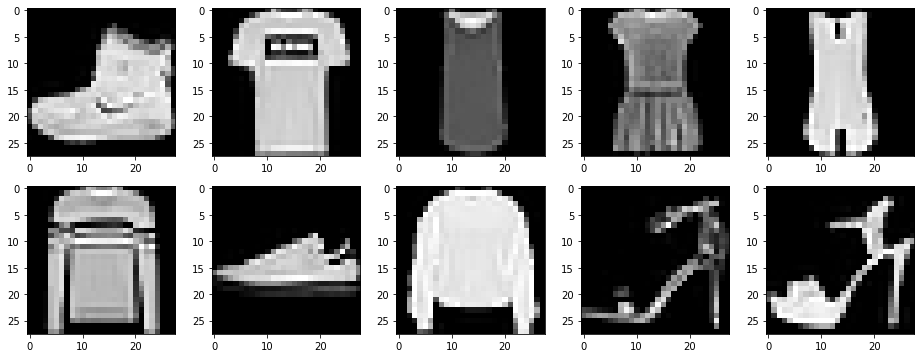

In [120]:
# репрезентация данных
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i,:].reshape([28, 28]), cmap='gray')